In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rc('font', family='NanumGothic')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import chart_studio
import chart_studio.plotly as py   # import plotly.plotly  => chart_studio.plotly 로 변경됨 
import plotly.graph_objs as go
import cufflinks as cf 
cf.go_offline(connected=True)
chart_studio.tools.set_credentials_file(username='***', api_key='***')

# 층별 보증금/월세 분포 확인

## 오피스텔 - 면적, 층

In [3]:
offi = pd.read_csv('data/officetels(기존데이터).csv')
offi

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동 개포로 213,월세,18.80,200,75,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),2,...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
1,서울특별시 강남구 개포동 개포로 213,월세,18.80,100,70,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),6,...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
2,서울특별시 강남구 개포동 개포로 213,월세,19.08,200,75,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),2,...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
3,서울특별시 강남구 개포동 개포로 213,월세,23.76,100,80,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),4,...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
4,서울특별시 강남구 개포동 개포로 213,월세,23.76,1000,80,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),2,...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208942,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10500,0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,6,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
208943,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10000,0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,3,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
208944,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
208945,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3


In [4]:
offi[offi.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
45,서울특별시 강남구 개포동 개포로 623,월세,32.44,5000,35,1997.0,2017-04-18,개포로 623,대청타워,7,...,37.494341198165127.07964775319401,1,1,0,1,0,2,2,0,4
72,서울특별시 강남구 개포동 개포로 623,전세,31.91,16500,0,1997.0,2020-03-28,개포로 623,대청타워,12,...,37.494341198165127.07964775319401,1,1,0,1,0,2,2,0,4
90,서울특별시 강남구 개포동 개포로 623,전세,32.44,18000,0,1997.0,2020-06-17,개포로 623,대청타워,25,...,37.494341198165127.07964775319401,1,1,0,1,0,2,2,0,4
229,서울특별시 강남구 논현동 논현로 641,전세,46.76,23000,0,2003.0,2019-10-04,논현로 641,논현동대우아이빌 힐타운,3,...,37.5108368999065127.03162940528,4,0,0,3,2,12,5,0,4
635,서울특별시 강남구 대치동 삼성로85길 42,전세,35.43,25000,0,2003.0,2018-02-08,삼성로85길 42,대치동대우아이빌멤버스,2,...,37.5045490585229127.053801125765,4,1,0,3,1,15,6,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208291,서울특별시 중랑구 상봉동 면목로96길 10,전세,32.44,20000,0,2017.0,2018-02-14,면목로96길 10,대성쉐르빌,5,...,37.5958857899922127.08677277871901,14,2,0,12,2,22,2,1,4
208320,서울특별시 중랑구 상봉동 면목로96길 28,전세,19.47,14000,0,2019.0,2020-03-31,면목로96길 28,이상부티끄타워,5,...,37.5960052612377127.087261864983,14,6,0,10,2,24,2,1,4
208439,서울특별시 중랑구 상봉동 봉우재로49길 9,전세,59.12,24000,0,2018.0,2018-11-15,봉우재로49길 9,솔렌시아3,3,...,37.594314479016106127.091984389208,0,2,2,0,0,20,4,0,0
208559,서울특별시 중랑구 신내동 신내로 211,월세,33.30,3500,40,2003.0,2016-06-18,신내로 211,금강리빙스텔,4,...,37.6163496295774127.09266824054899,5,1,0,2,0,5,5,0,1


In [5]:
print(offi.shape)
offi.drop_duplicates(inplace=True)
offi.shape

(208947, 27)


(207396, 27)

In [6]:
208947 - 1551

207396

In [7]:
offi.isnull().sum()

address            0
rent               0
size               0
deposit            0
pay                0
year            7903
contract           0
road               0
name               0
floor              0
area               0
recent             0
latitude           0
longitude          0
station_area       0
station_name       0
transfer           0
criteria           0
hos_num            0
mart_num           0
fast_num           0
cafe_num           0
cul_num            0
con_num            0
laun_num           0
da_num             0
gym_num            0
dtype: int64

In [8]:
offi_check = offi.drop(['recent','year'], axis=1).copy()
offi_check[offi_check.duplicated()]

,address,rent,size,deposit,pay,contract,road,name,floor,area,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num


In [9]:
offi[offi['year'].isnull()]['contract'].value_counts().sort_index()

2015-10-09    1
2015-10-10    1
2015-10-15    1
2015-10-23    1
2015-11-12    1
             ..
2020-09-20    1
2020-09-24    2
2020-09-25    1
2020-09-28    2
2020-09-29    1
Name: contract, Length: 1457, dtype: int64

In [10]:
offi.reset_index(inplace=True)
offi.drop('index', axis=1, inplace=True)
offi.tail(3)

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
207395,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-30,중랑천로14길 58,중화동 범양프레체,6,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3


### 면적

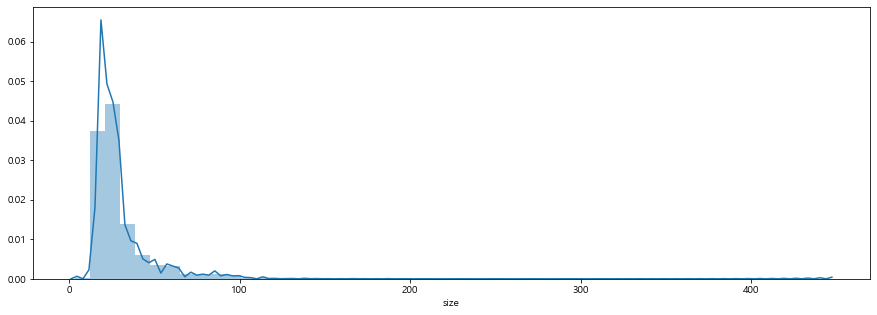

In [11]:
plt.figure(figsize=(15, 5))
sns.distplot(offi['size'])

In [12]:
plt.figure(figsize=(15,17))
offi['size'].value_counts().sort_index().iplot(kind='bar')

<Figure size 1080x1224 with 0 Axes>

- 30 이전 다수
- 33...m2 => 10평

In [19]:
offi['size_cut'] = np.nan
offi.loc[(offi['size']<16.528926), 'size_cut'] = '5평 미만'
offi.loc[(offi['size']>=16.528926) & (offi['size']<30), 'size_cut'] = '5~10'   # 30.2 많음  # 원래는 33
offi.loc[(offi['size']>=30) & (offi['size']<48), 'size_cut'] = '10~15'
offi.loc[(offi['size']>=48) & (offi['size']<66.115702), 'size_cut'] = '15~20'
offi.loc[(offi['size']>=66.115702) & (offi['size']<82.644628), 'size_cut'] = '20~25'
offi.loc[(offi['size']>=82.644628) & (offi['size']<99.173554), 'size_cut'] = '25~30'
offi.loc[(offi['size']>=99.173554), 'size_cut'] = '30평 이상'

In [20]:
offi['size_cut'].isnull().sum()

0

In [21]:
offi['size_cut'].value_counts()  # 151088

5~10      139911
10~15      34088
15~20      12223
5평 미만      11859
25~30       3745
20~25       3688
30평 이상      1882
Name: size_cut, dtype: int64

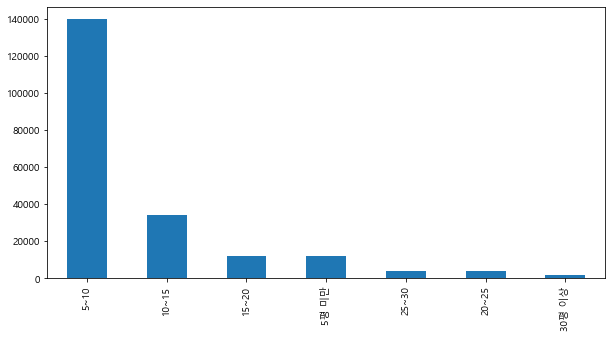

In [22]:
offi['size_cut'].value_counts().plot(kind='bar', figsize=(10,5))

- 5~10평이 대다수

In [23]:
offi_tmp = offi.groupby(['size_cut'])[['deposit','pay']].median().reset_index()
offi_tmp

,size_cut,deposit,pay
0,10~15,12000,0
1,15~20,22500,0
2,20~25,27000,0
3,25~30,32000,0
4,30평 이상,47000,0
5,5~10,5000,35
6,5평 미만,3400,30


### 층

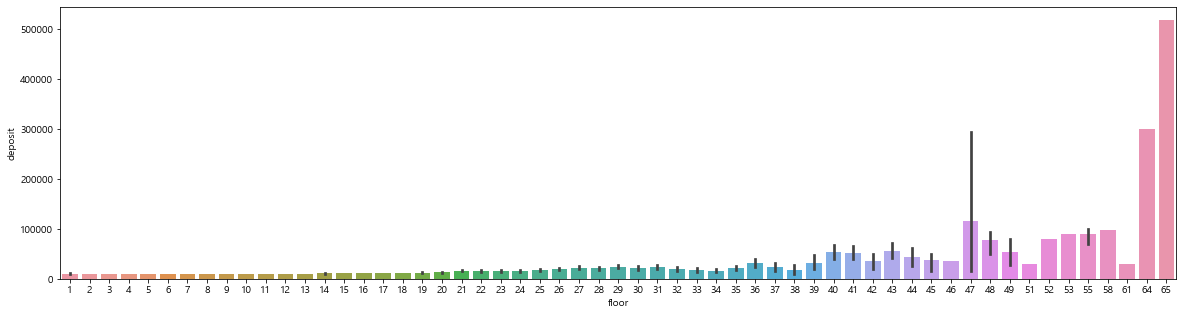

In [286]:
# 층별 분포 그리기
plt.figure(figsize=(20, 5))
sns.barplot(data=offi, x='floor', y='deposit')

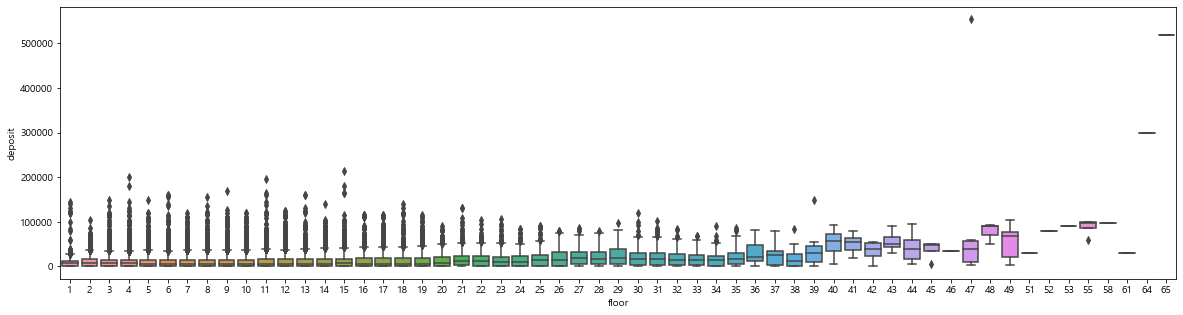

In [287]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=offi, x='floor', y='deposit')

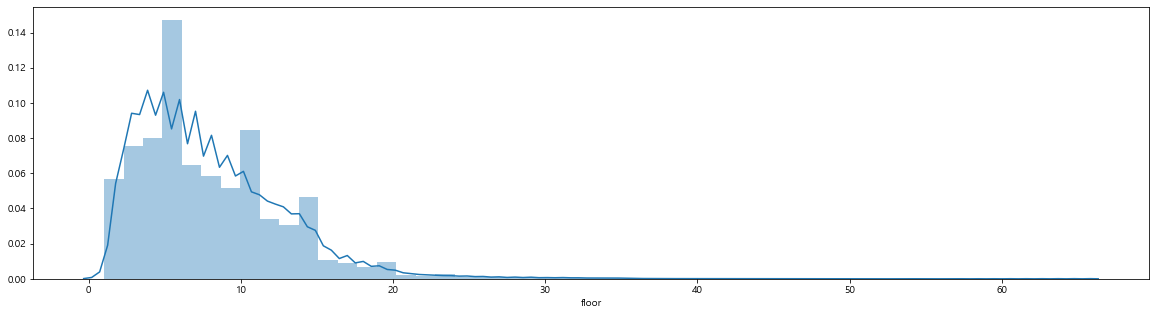

In [288]:
plt.figure(figsize=(20, 5))
sns.distplot(offi['floor'])

In [289]:
offi['floor'].value_counts().sort_index()

1       805
2     14250
3     20060
4     21254
5     20221
6     18858
7     17226
8     15570
9     13695
10    12583
11     9827
12     9090
13     8183
14     7257
15     5115
16     2879
17     2397
18     1854
19     1465
20     1023
21      605
22      483
23      408
24      345
25      306
26      246
27      201
28      171
29      176
30      129
31      142
32      117
33       90
34       98
35       82
36       39
37       28
38       21
39       21
40       12
41        8
42        6
43        7
44       10
45        4
46        1
47        6
48        3
49        7
51        1
52        1
53        1
55        4
58        1
61        2
64        1
65        1
Name: floor, dtype: int64

In [290]:
# 저층1~9, 중간층10~20 , 고층(20층 이상)   # 지하, 1층은 연립에만 적용

In [291]:
offi['floor_cut'] = np.nan
offi.loc[(offi['floor']>=1) & (offi['floor']<7), 'floor_cut'] = '저층'
offi.loc[(offi['floor']>=7) & (offi['floor']<10), 'floor_cut'] = '중저층'
offi.loc[(offi['floor']>=10) & (offi['floor']<20), 'floor_cut'] = '중층'
offi.loc[(offi['floor']>=20) & (offi['floor']<40), 'floor_cut'] = '고층'
offi.loc[(offi['floor']>=40), 'floor_cut'] = '최고층'

In [292]:
offi['floor_cut'].isnull().sum()

0

In [293]:
offi['floor_cut'].value_counts()

저층     95448
중층     60650
중저층    46491
고층      4731
최고층       76
Name: floor_cut, dtype: int64

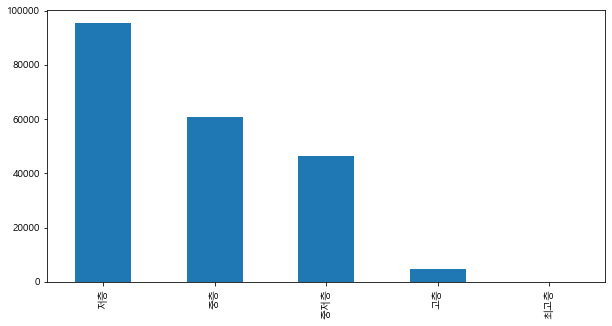

In [294]:
offi['floor_cut'].value_counts().plot(kind='bar', figsize=(10,5))

In [295]:
offi.groupby(['floor_cut'])[['deposit','pay']].median()

,deposit,pay
floor_cut,,
고층,13500.0,40.0
저층,7500.0,10.0
중저층,6000.0,30.0
중층,5000.0,40.0
최고층,50000.0,52.5


## 연립(빌라) - 면적, 층
- null값, 0값 확인

In [139]:
villa = pd.read_csv('data/villa(기존데이터).csv')
villa

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동,월세,34.22,3000,30,2012.0,2015-10-14,,아름다운집,NaN,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
1,서울특별시 강남구 개포동,월세,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,2.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
2,서울특별시 강남구 개포동,월세,48.50,3000,53,1988.0,2015-08-17,,영동A,0.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
3,서울특별시 강남구 개포동,월세,48.50,10000,40,1988.0,2016-01-21,,영동B,1.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
4,서울특별시 강남구 개포동,월세,53.99,28000,20,2013.0,2016-02-19,,장원,5.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503833,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,1.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
503834,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
503835,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
503836,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1


In [140]:
villa[villa.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
17,서울특별시 강남구 개포동 개포로15길 25,월세,52.59,15000,50,1988.0,2020-05-11,개포로15길 25,강남빌라 가동,2.0,...,37.4801009360233127.045467266355,4,0,1,2,0,0,3,1,2
55,서울특별시 강남구 개포동 개포로15길 32-3,전세,82.24,30000,0,1991.0,2020-05-09,개포로15길 32-3,수정빌라,1.0,...,37.4801575682925127.04626968536999,4,0,0,2,0,0,0,0,0
212,서울특별시 강남구 개포동 개포로20길 24-1,월세,29.81,5000,105,2018.0,2020-03-21,개포로20길 24-1,아크빌라 A동,5.0,...,37.480654365480795127.04745396072599,3,0,0,1,2,0,1,0,2
221,서울특별시 강남구 개포동 개포로20길 35,월세,39.38,10000,20,1993.0,2019-10-21,개포로20길 35,강남하이츠,4.0,...,37.4767628966036127.04880498953001,4,0,0,2,0,0,0,0,0
241,서울특별시 강남구 개포동 개포로20길 37,전세,22.32,8500,0,1995.0,2019-04-25,개포로20길 37,새롬그린빌,3.0,...,37.4766522952087127.04891989395,4,0,0,2,2,14,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503685,서울특별시 중랑구 중화동 중랑천로18길 5,전세,29.80,21000,0,2015.0,2020-02-20,중랑천로18길 5,성우스타팰리스,2.0,...,37.5953549204831127.072638326554,6,0,3,2,0,4,2,0,2
503728,서울특별시 중랑구 중화동 중랑천로20길 44,전세,41.33,9000,0,1993.0,2019-06-20,중랑천로20길 44,소산하이츠맨션2차,1.0,...,37.5974490030615127.073802059765,1,0,0,0,0,6,5,0,2
503793,서울특별시 중랑구 중화동 중랑천로25길 12,전세,43.55,37400,0,2020.0,2020-03-30,중랑천로25길 12,우연캐슬,4.0,...,37.5964511233094127.07136356879101,0,0,0,0,0,2,2,0,0
503807,서울특별시 중랑구 중화동 중랑천로29길 14-17,전세,56.64,31900,0,2019.0,2020-06-17,중랑천로29길 14-17,더플러스,2.0,...,37.596808490486495127.071307178876,0,0,0,0,0,2,2,0,0


In [141]:
# 중복삭제
villa.drop_duplicates(inplace=True)
villa.shape

(495250, 27)

In [142]:
503838 - 8588

495250

In [143]:
villa.isnull().sum()

address            0
rent               0
size               0
deposit            0
pay                0
year              14
contract           0
road               0
name               5
floor           3140
area               0
recent             0
latitude           0
longitude          0
station_area       0
station_name       0
transfer           0
criteria           0
hos_num            0
mart_num           0
fast_num           0
cafe_num           0
cul_num            0
con_num            0
laun_num           0
da_num             0
gym_num            0
dtype: int64

In [144]:
villa_check = villa.drop(['recent','year'], axis=1).copy()
villa_check[villa_check.duplicated()]

,address,rent,size,deposit,pay,contract,road,name,floor,area,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num


In [145]:
# 층수 null값 제거!! 대부분 2015~2016data
villa[villa['floor'].isnull()]['contract'].value_counts().sort_index()

2015-01-01     2
2015-01-02     5
2015-01-03     4
2015-01-04     1
2015-01-05    11
              ..
2016-04-20     1
2016-04-21     4
2016-04-22     2
2016-04-23     6
2016-04-25     2
Name: contract, Length: 456, dtype: int64

In [146]:
villa[villa['floor'].isnull()]['address'].value_counts().sort_values()    # null삭제예정 주소에는 대체할만한 데이터 많음

서울특별시 강북구 번동 오현로31길 17-6       1
서울특별시 강동구 길동 양재대로116길          1
서울특별시 노원구 상계동 동일로237가길 37      1
서울특별시 서대문구 홍제동 홍제원6길 14-11     1
서울특별시 종로구 혜화동 혜화로 42           1
                              ..
서울특별시 영등포구 양평동6가               8
서울특별시 강서구 화곡동                  8
서울특별시 양천구 신월동                  9
서울특별시 강남구 역삼동 언주로98길          10
서울특별시 양천구 목동                  16
Name: address, Length: 2681, dtype: int64

In [147]:
villa[villa['address'].str.contains('서울특별시 양천구 목동 ')]  # 서울특별시 양천구 목동

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
391193,서울특별시 양천구 목동,월세,15.18,1000,40,2015.0,2015-11-09,,(546-0),2.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
391194,서울특별시 양천구 목동,월세,23.00,6500,50,2016.0,2016-04-06,,에프앤드에이빌라,0.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
391195,서울특별시 양천구 목동,월세,23.65,4000,35,2015.0,2016-02-16,,대명이튼캐슬2차,2.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
391196,서울특별시 양천구 목동,월세,26.48,15000,3,2016.0,2016-10-31,,에코빌,4.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
391197,서울특별시 양천구 목동,월세,27.81,3000,50,2015.0,2015-10-17,,용하이츠빌,5.0,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402926,서울특별시 양천구 목동 오목로56길 20,월세,41.34,500,45,1991.0,2018-05-18,오목로56길 20,성구빌라(가동),-1.0,...,37.5230306406379126.873498468522,8,1,0,4,2,10,6,1,16
402927,서울특별시 양천구 목동 오목로56길 20,전세,36.18,13000,0,1991.0,2017-06-28,오목로56길 20,성구빌라(가동),4.0,...,37.5230306406379126.873498468522,8,1,0,4,2,10,6,1,16
402928,서울특별시 양천구 목동 오목로56길 20,전세,41.34,15000,0,1991.0,2017-06-13,오목로56길 20,성구빌라(가동),3.0,...,37.5230306406379126.873498468522,8,1,0,4,2,10,6,1,16
402929,서울특별시 양천구 목동 오목로56길 20,전세,41.34,13000,0,1991.0,2017-07-12,오목로56길 20,성구빌라(가동),2.0,...,37.5230306406379126.873498468522,8,1,0,4,2,10,6,1,16


In [148]:
villa[villa['address'].str.contains('서울특별시 강남구 역삼동 언주로98길 ')]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
23587,서울특별시 강남구 역삼동 언주로98길,월세,38.36,500,70,2012.0,2015-06-13,언주로98길,루트원레지던스,NaN,...,37.5049019641289127.04332542968001,4,0,0,2,0,15,8,0,5
23588,서울특별시 강남구 역삼동 언주로98길,전세,36.15,13125,0,2012.0,2015-05-26,언주로98길,루트원레지던스,NaN,...,37.5049019641289127.04332542968001,4,0,0,2,0,15,8,0,5
23589,서울특별시 강남구 역삼동 언주로98길,전세,37.73,13000,0,2012.0,2015-02-26,언주로98길,루트원레지던스,NaN,...,37.5049019641289127.04332542968001,4,0,0,2,0,15,8,0,5
23590,서울특별시 강남구 역삼동 언주로98길,전세,37.73,14000,0,2012.0,2015-03-12,언주로98길,루트원레지던스,NaN,...,37.5049019641289127.04332542968001,4,0,0,2,0,15,8,0,5
23591,서울특별시 강남구 역삼동 언주로98길,전세,37.90,12600,0,2012.0,2015-05-22,언주로98길,루트원레지던스,NaN,...,37.5049019641289127.04332542968001,4,0,0,2,0,15,8,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,서울특별시 강남구 역삼동 언주로98길 36,전세,33.98,32000,0,2012.0,2019-10-04,언주로98길 36,루트원레지던스,15.0,...,37.5045226939684127.04463486721701,6,0,0,10,0,15,9,0,11
23657,서울특별시 강남구 역삼동 언주로98길 36,전세,33.98,34650,0,2012.0,2020-07-13,언주로98길 36,루트원레지던스,14.0,...,37.5045226939684127.04463486721701,6,0,0,10,0,15,9,0,11
23658,서울특별시 강남구 역삼동 언주로98길 36,전세,40.13,30000,0,2012.0,2015-01-15,언주로98길 36,루트원레지던스,15.0,...,37.5045226939684127.04463486721701,6,0,0,10,0,15,9,0,11
23659,서울특별시 강남구 역삼동 언주로98길 39-12,전세,40.56,7000,0,2000.0,2019-03-04,언주로98길 39-12,스위트빌,1.0,...,37.5052642288162127.04532509066401,4,0,0,6,2,15,11,0,12


In [149]:
# floor null값 삭제
print(villa.shape)
idx1 = villa[villa['floor'].isnull()].index  # 3140개
villa.drop(idx1, inplace=True)
villa.shape

(495250, 27)


(492110, 27)

In [150]:
495250 - 3140

492110

In [151]:
# year null값  -> 냅두기
villa['year'].isnull().sum()

14

In [152]:
villa[villa['year'].isnull()]['contract'].value_counts().sort_index()

2015-06-10    1
2016-01-11    1
2016-05-04    1
2016-08-04    1
2016-09-28    1
2016-12-08    1
2017-07-04    1
2018-01-24    1
2018-03-07    1
2018-04-14    1
2018-08-08    1
2018-11-28    1
2020-01-29    1
2020-09-01    1
Name: contract, dtype: int64

In [153]:
villa.reset_index(inplace=True)
villa.drop('index', axis=1, inplace=True)
villa.tail(3)   # 492110

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
492109,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2019-01-31,중랑천로36길 5-4,진주빌라,3.0,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1


In [154]:
villa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492110 entries, 0 to 492109
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       492110 non-null  object 
 1   rent          492110 non-null  object 
 2   size          492110 non-null  float64
 3   deposit       492110 non-null  int64  
 4   pay           492110 non-null  int64  
 5   year          492096 non-null  float64
 6   contract      492110 non-null  object 
 7   road          492110 non-null  object 
 8   name          492105 non-null  object 
 9   floor         492110 non-null  float64
 10  area          492110 non-null  object 
 11  recent        492110 non-null  int64  
 12  latitude      492110 non-null  float64
 13  longitude     492110 non-null  float64
 14  station_area  492110 non-null  int64  
 15  station_name  492110 non-null  object 
 16  transfer      492110 non-null  int64  
 17  criteria      492110 non-null  object 
 18  hos_

### 면적

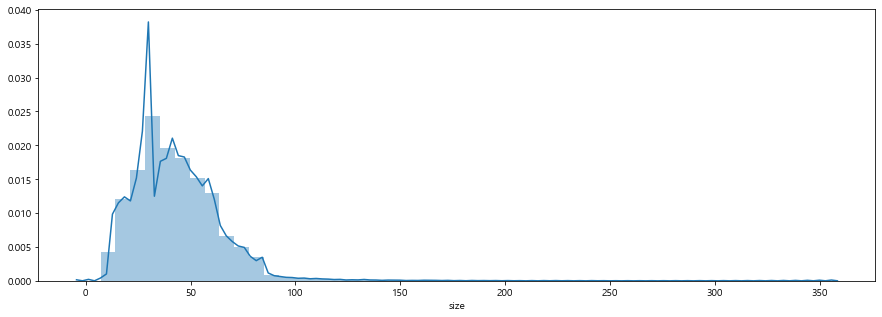

In [155]:
plt.figure(figsize=(15, 5))
sns.distplot(villa['size'])

In [156]:
plt.figure(figsize=(15,17))
villa['size'].value_counts().sort_index().iplot(kind='bar')

<Figure size 1080x1224 with 0 Axes>

- 30, 60
- 33...m2 => 10평, 66...m2 => 20평

In [157]:
villa['size_cut'] = np.nan
villa.loc[(villa['size']<16.528926), 'size_cut'] = '5평 미만'
villa.loc[(villa['size']>=16.528926) & (villa['size']<30), 'size_cut'] = '5~10'
villa.loc[(villa['size']>=30) & (villa['size']<49.586777), 'size_cut'] = '10~15'
villa.loc[(villa['size']>=49.586777) & (villa['size']<66.115702), 'size_cut'] = '15~20'
villa.loc[(villa['size']>=66.115702) & (villa['size']<99.173554), 'size_cut'] = '20~30'
# villa.loc[(villa['size']>=66.115702) & (villa['size']<82.644628), 'size_cut'] = '20~25'
# villa.loc[(villa['size']>=82.644628) & (villa['size']<99.173554), 'size_cut'] = '25~30'
villa.loc[(villa['size']>=99.173554), 'size_cut'] = '30평 이상'

In [158]:
villa['size_cut'].isnull().sum()

0

In [159]:
villa['size_cut'].value_counts()

10~15     164624
5~10      136496
15~20     106480
20~30      48649
5평 미만      29312
30평 이상      6549
Name: size_cut, dtype: int64

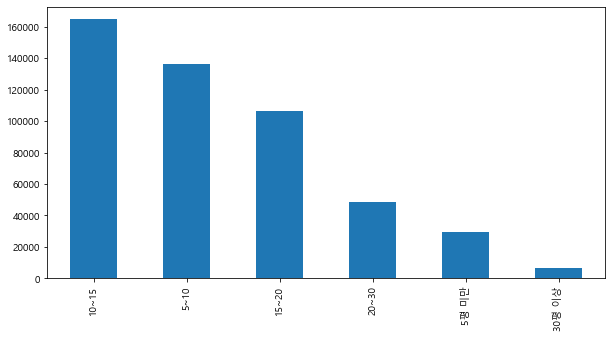

In [160]:
villa['size_cut'].value_counts().plot(kind='bar', figsize=(10,5))

### 층

In [161]:
villa['floor'].isnull().sum()  # null 지웠음

0

In [162]:
villa['floor'].value_counts().sort_index()   # 지하, 1층, 저층(2~5층?), 중층(6~9층), 고층(10~15), 최고층(16~)

-3.0          3
-2.0         10
-1.0      10216
 0.0        370
 1.0      50931
 2.0     131776
 3.0     123821
 4.0      93048
 5.0      54986
 6.0      14975
 7.0       4624
 8.0       2721
 9.0       1708
 10.0      1020
 11.0       524
 12.0       360
 13.0       294
 14.0       181
 15.0       144
 16.0       101
 17.0       102
 18.0        92
 19.0        67
 20.0        35
 34.0         1
Name: floor, dtype: int64

C:\Users\qkrwl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\qkrwl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



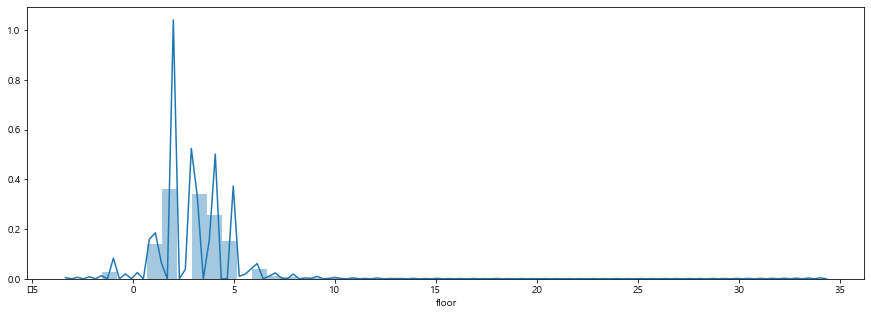

In [163]:
plt.figure(figsize=(15, 5))
sns.distplot(villa['floor'])

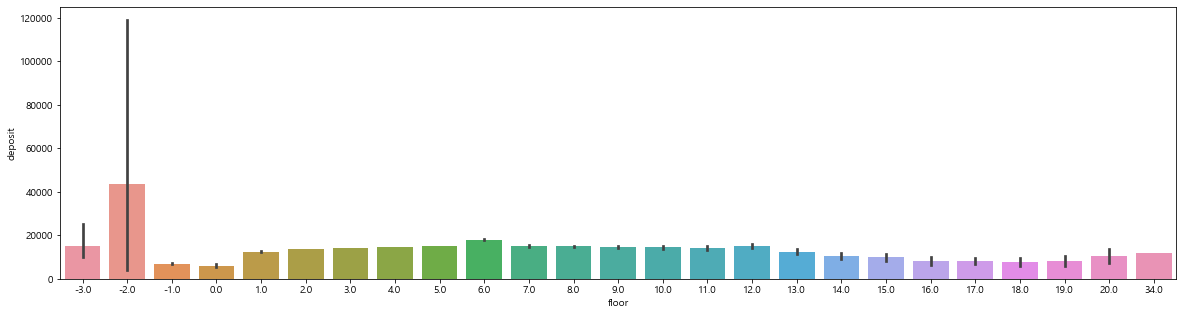

In [164]:
plt.figure(figsize=(20, 5))
sns.barplot(data=villa, x='floor', y='deposit')

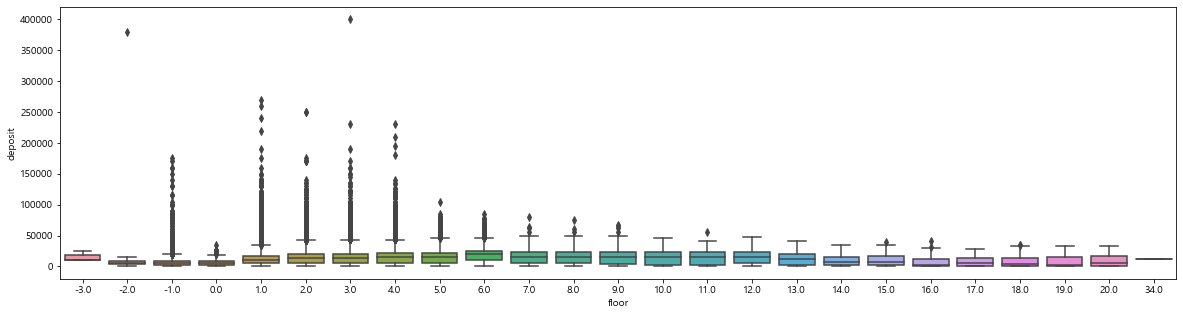

In [165]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=villa, x='floor', y='deposit')

In [166]:
# 지하, 1층, 저층(2~5층?), 중층(6~9층), 고층(10~15), ~~최고층(16~)~~

In [167]:
villa['floor_cut'] = np.nan
villa.loc[(villa['floor']<1), 'floor_cut'] = '지하'
villa.loc[(villa['floor']==1), 'floor_cut'] = '1층'
villa.loc[(villa['floor']>1) & (villa['floor']<6), 'floor_cut'] = '저층'
villa.loc[(villa['floor']>=6) & (villa['floor']<10), 'floor_cut'] = '중층'
villa.loc[(villa['floor']>=10), 'floor_cut'] = '고층'
# villa.loc[(villa['floor']>=10) & (villa['floor']<16), 'floor_cut'] = '고층'
# villa.loc[(villa['floor']>=16), 'floor_cut'] = '최고층'

In [168]:
villa['floor_cut'].isnull().sum()

0

In [169]:
villa['floor_cut'].value_counts()

저층    403631
1층     50931
중층     24028
지하     10599
고층      2921
Name: floor_cut, dtype: int64

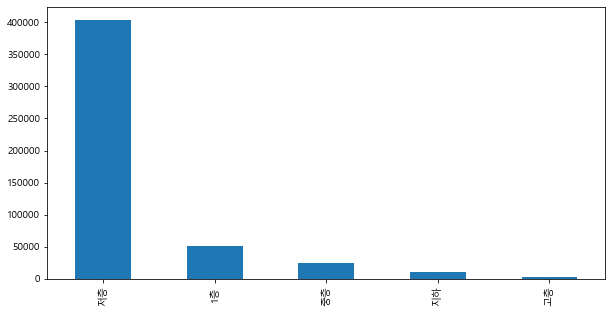

In [170]:
villa['floor_cut'].value_counts().plot(kind='bar', figsize=(10,5))

In [171]:
villa.groupby(['floor_cut'])[['deposit','pay']].median()

,deposit,pay
floor_cut,,
1층,11000,0
고층,13000,0
저층,14000,0
중층,18375,0
지하,5800,0


## 단독다가구 - 면적 범주화 & 중복 데이터 삭제

In [24]:
one = pd.read_csv('data/one_two_room(기존데이터).csv')
one

,address,rent,size,deposit,pay,year,contract,road,area,recent,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동 개포로,월세,26.00,1000,80,1988.0,2016-04-20,개포로,강남구,1,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
1,서울특별시 강남구 개포동 개포로,전세,100.00,24000,0,1988.0,2016-07-25,개포로,강남구,0,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
2,서울특별시 강남구 개포동 개포로,전세,100.00,25500,0,1988.0,2018-05-06,개포로,강남구,1,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,0,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,1,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688658,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
688659,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
688660,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
688661,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1


In [25]:
one[one.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,area,recent,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
72,서울특별시 강남구 개포동 개포로15길,전세,58.00,20000,0,1992.0,2019-07-02,개포로15길,강남구,1,...,37.479780087904295127.04522930859699,8,0,2,4,2,8,2,1,4
197,서울특별시 강남구 개포동 개포로17길,전세,50.00,20000,0,1990.0,2017-02-27,개포로17길,강남구,0,...,37.4798545267632127.046580863676,4,0,1,2,0,9,1,0,2
209,서울특별시 강남구 개포동 개포로17길,전세,63.25,15000,0,1992.0,2019-01-23,개포로17길,강남구,1,...,37.4798545267632127.046580863676,4,0,1,2,0,9,1,0,2
248,서울특별시 강남구 개포동 개포로20길,전세,75.00,18000,0,1988.0,2016-01-29,개포로20길,강남구,0,...,37.477039601042127.048356001948,4,0,0,3,1,14,6,0,4
269,서울특별시 강남구 개포동 개포로21길,월세,50.00,3000,70,2001.0,2015-08-10,개포로21길,강남구,1,...,37.479714132522396127.04707846239,0,0,0,2,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688613,서울특별시 중랑구 중화동 중랑천로30길,전세,41.42,8000,0,1992.0,2016-10-01,중랑천로30길,중랑구,1,...,37.597740193217895127.074105823501,1,0,0,0,0,4,5,0,2
688619,서울특별시 중랑구 중화동 중랑천로30길,전세,50.40,13000,0,1984.0,2016-09-02,중랑천로30길,중랑구,1,...,37.597740193217895127.074105823501,1,0,0,0,0,4,5,0,2
688651,서울특별시 중랑구 중화동 중랑천로36길,전세,27.70,15000,0,2018.0,2018-10-24,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
688654,서울특별시 중랑구 중화동 중랑천로36길,전세,35.00,15000,0,2018.0,2018-12-22,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1


In [26]:
# 중복삭제
one.drop_duplicates(inplace=True)
one.shape

(667054, 25)

In [27]:
688663 - 21609

667054

In [28]:
# 건축년도 빼면, 중복되는 데이터 때문에 생기는 문제였음
one_check = one.drop(['recent','year'], axis=1).copy()
idx1 = one_check[one_check.duplicated()].index
idx1   #  801개 중복됨

Int64Index([   145,   1019,   6797,   7227,   7359,   7655,  11323,  12770,
             17472,  19002,
            ...
            667616, 669842, 670326, 674740, 676672, 679105, 679107, 679796,
            681257, 684727],
           dtype='int64', length=801)

In [29]:
one.drop(idx1, inplace=True)
one.shape

(666253, 25)

In [30]:
one.reset_index(inplace=True)
one.drop('index', axis=1, inplace=True)
one.tail(3)

,address,rent,size,deposit,pay,year,contract,road,area,recent,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
666252,서울특별시 중랑구 중화동 중랑천로36길,전세,70.98,14500,0,2018.0,2018-11-02,중랑천로36길,중랑구,1,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1


In [31]:
plt.figure(figsize=(15,17))
one['size'].value_counts().sort_index().iplot(kind='bar')

<Figure size 1080x1224 with 0 Axes>

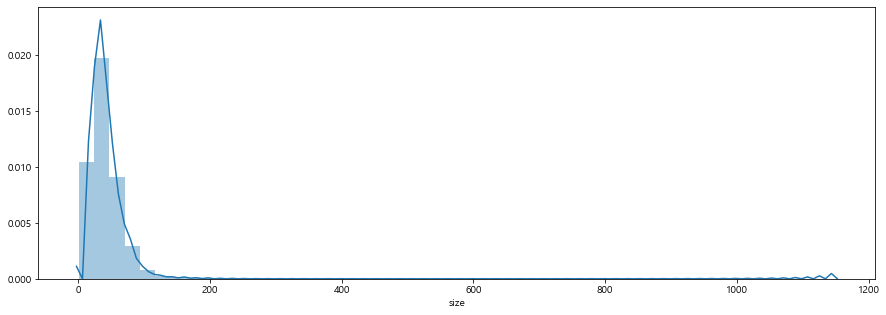

In [32]:
plt.figure(figsize=(15, 5))
sns.distplot(one['size'])

평수 범주화       -> 범주별 개수 확인 후, 범위 조정&병합(특히 큰 평수들)    
1평 = 3.305785m2
- 5평 미만: 16.528926
- 5 ~ 10평 미만: 16.528926 ~ 33.057851
- 10 ~ 15: 33.057851 ~ 49.586777
- 15 ~ 20: 49.586777 ~ 66.115702
- 20 ~ 30: 66.115702 ~ 99.173554
- 30평 이상

In [39]:
one['size_cut'] = np.nan
one.loc[(one['size']<16.528926), 'size_cut'] = '5평 미만'
one.loc[(one['size']>=16.528926) & (one['size']<33.057851), 'size_cut'] = '5~10'
one.loc[(one['size']>=33.057851) & (one['size']<49.586777), 'size_cut'] = '10~15'
one.loc[(one['size']>=49.586777) & (one['size']<66.115702), 'size_cut'] = '15~20'
one.loc[(one['size']>=66.115702) & (one['size']<99.173554), 'size_cut'] = '20~30'
# one.loc[(one['size']>=66.115702) & (one['size']<82.644628), 'size_cut'] = '20~25'
# one.loc[(one['size']>=82.644628) & (one['size']<99.173554), 'size_cut'] = '25~30'
one.loc[(one['size']>=99.173554), 'size_cut'] = '30평 이상'

In [40]:
one['size_cut'].isnull().sum()

0

In [41]:
one['size_cut'].value_counts()

5~10      233227
10~15     195354
15~20     104653
20~30      64427
5평 미만      52855
30평 이상     15737
Name: size_cut, dtype: int64

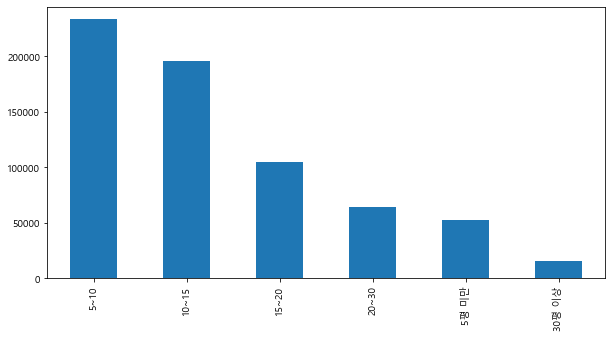

In [42]:
one['size_cut'].value_counts().plot(kind='bar', figsize=(10,5))

In [43]:
one.groupby(['size_cut'])[['deposit','pay']].mean()

,deposit,pay
size_cut,,
10~15,6339.162177,21.344134
15~20,9379.761612,21.516373
20~30,12012.276220,21.573253
30평 이상,15625.959522,28.964796
5~10,3953.684286,21.388716
5평 미만,2806.392508,21.676114


In [44]:
one

,address,rent,size,deposit,pay,year,contract,road,area,recent,...,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut
0,서울특별시 강남구 개포동 개포로,월세,26.00,1000,80,1988.0,2016-04-20,개포로,강남구,1,...,1,0,0,1,2,9,4,0,1,5~10
1,서울특별시 강남구 개포동 개포로,전세,100.00,24000,0,1988.0,2016-07-25,개포로,강남구,0,...,1,0,0,1,2,9,4,0,1,30평 이상
2,서울특별시 강남구 개포동 개포로,전세,100.00,25500,0,1988.0,2018-05-06,개포로,강남구,1,...,1,0,0,1,2,9,4,0,1,30평 이상
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,0,...,1,0,0,1,2,9,4,0,1,5~10
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,1,...,1,0,0,1,2,9,4,0,1,5~10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,1,...,0,0,0,0,0,2,2,0,1,10~15
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,1,...,0,0,0,0,0,2,2,0,1,10~15
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,1,...,0,0,0,0,0,2,2,0,1,10~15
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,1,...,0,0,0,0,0,2,2,0,1,15~20


# 최신화 작업

## 단독다가구

### recent 삭제, join_key 생성

In [45]:
one2 = one.drop('recent', axis=1)
one2

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut
0,서울특별시 강남구 개포동 개포로,월세,26.00,1000,80,1988.0,2016-04-20,개포로,강남구,37.476873,...,1,0,0,1,2,9,4,0,1,5~10
1,서울특별시 강남구 개포동 개포로,전세,100.00,24000,0,1988.0,2016-07-25,개포로,강남구,37.476873,...,1,0,0,1,2,9,4,0,1,30평 이상
2,서울특별시 강남구 개포동 개포로,전세,100.00,25500,0,1988.0,2018-05-06,개포로,강남구,37.476873,...,1,0,0,1,2,9,4,0,1,30평 이상
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,37.476873,...,1,0,0,1,2,9,4,0,1,5~10
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,37.476873,...,1,0,0,1,2,9,4,0,1,5~10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,37.600814,...,0,0,0,0,0,2,2,0,1,10~15
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,37.600814,...,0,0,0,0,0,2,2,0,1,10~15
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,37.600814,...,0,0,0,0,0,2,2,0,1,10~15
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,37.600814,...,0,0,0,0,0,2,2,0,1,15~20


In [46]:
# float type -> str 
one2['size'] = one2['size'].astype(str)
one2['deposit'] = one2['deposit'].astype(str)
one2['pay'] = one2['pay'].astype(str)

In [47]:
# join key 생성
one2['join_key'] = one2['address']+one2['rent']+one2['size_cut']+one2['size']+one2['deposit']+one2['pay']+one2['contract']
one2

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,join_key
0,서울특별시 강남구 개포동 개포로,월세,26.0,1000,80,1988.0,2016-04-20,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로월세5~1026.01000802016-04-20
1,서울특별시 강남구 개포동 개포로,전세,100.0,24000,0,1988.0,2016-07-25,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02400002016-07-25
2,서울특별시 강남구 개포동 개포로,전세,100.0,25500,0,1988.0,2018-05-06,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441300002015-12-17
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441450002018-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1543.11900002016-09-23
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1547.681300002020-02-06
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1548.19600002019-09-01
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,15~20,서울특별시 중랑구 중화동 중랑천로36길전세15~2050.291400002020-02-18


In [48]:
one2['join_key'].value_counts().sort_values()

서울특별시 영등포구 신길동 신풍로20길전세15~2060.01850002018-04-23      1
서울특별시 강서구 화곡동 강서로17다길월세5~1030.01000402016-01-19       1
서울특별시 관악구 신림동 서림6길월세5~1020.0300302018-01-22           1
서울특별시 중구 장충동2가 필동로1길월세5~1019.42500252019-02-17        1
서울특별시 도봉구 쌍문동 우이천로50길전세15~2055.14700002019-04-19      1
                                                     ..
서울특별시 동작구 대방동 여의대방로24다길월세5평 미만13.2500442015-12-01     1
서울특별시 관악구 봉천동 양녕로2길전세15~2059.52500002018-05-08        1
서울특별시 성북구 상월곡동 화랑로15가길전세15~2055.981200002020-04-08    1
서울특별시 송파구 송파동 송이로4길월세10~1536.0500432016-08-12         1
서울특별시 성동구 하왕십리동 무학봉15다길월세5~1030.01500352018-05-15     1
Name: join_key, Length: 666253, dtype: int64

### 다른 df에서 최신화 처리 - floor X

In [49]:
data = one2.groupby(['address','rent','size_cut','size','contract', 'deposit','pay'])[['area']].count().reset_index()
data    # 666253

,address,rent,size_cut,size,contract,deposit,pay,area
0,서울특별시 강남구 개포동 개포로,월세,5~10,26.0,2016-04-20,1000,80,1
1,서울특별시 강남구 개포동 개포로,전세,20~30,90.0,2020-07-01,35000,0,1
2,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2016-07-25,24000,0,1
3,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2018-05-06,25500,0,1
4,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,2015-12-17,13000,0,1
...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,1
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,1
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,1
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,1


In [50]:
data.rename(columns = {'area':'recent'}, inplace=True)
data['recent'] = np.nan
data

,address,rent,size_cut,size,contract,deposit,pay,recent
0,서울특별시 강남구 개포동 개포로,월세,5~10,26.0,2016-04-20,1000,80,NaN
1,서울특별시 강남구 개포동 개포로,전세,20~30,90.0,2020-07-01,35000,0,NaN
2,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2016-07-25,24000,0,NaN
3,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2018-05-06,25500,0,NaN
4,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,2015-12-17,13000,0,NaN
...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,NaN
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,NaN
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,NaN
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,NaN


In [51]:
data = data.sort_values(['address','rent','size_cut','contract'], ascending=False).reset_index()
data.drop('index', axis=1, inplace=True)
data.head(30)         # address, rent, size_cut

,address,rent,size_cut,size,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,29.0,2018-11-02,14500,0,NaN
1,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,NaN
5,서울특별시 중랑구 중화동 중랑천로36길,전세,15~20,50.29,2020-02-18,14000,0,NaN
6,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,39.0,2020-07-07,15000,0,NaN
7,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,35.49,2020-02-12,15000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,47.68,2020-02-06,13000,0,NaN
9,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,48.19,2019-09-01,6000,0,NaN


In [52]:
data.tail(20)

,address,rent,size_cut,size,contract,deposit,pay,recent
666233,서울특별시 강남구 개포동 개포로15길,월세,5~10,26.0,2015-06-30,4000,40,NaN
666234,서울특별시 강남구 개포동 개포로15길,월세,5~10,19.8,2015-04-06,500,20,NaN
666235,서울특별시 강남구 개포동 개포로15길,월세,5~10,21.2,2015-02-17,1000,45,NaN
666236,서울특별시 강남구 개포동 개포로15길,월세,5~10,20.0,2015-02-14,2500,35,NaN
666237,서울특별시 강남구 개포동 개포로15길,월세,15~20,59.0,2017-11-11,15000,20,NaN
666238,서울특별시 강남구 개포동 개포로15길,월세,15~20,49.72,2017-10-26,2000,60,NaN
666239,서울특별시 강남구 개포동 개포로15길,월세,15~20,52.75,2015-10-28,12000,50,NaN
666240,서울특별시 강남구 개포동 개포로15길,월세,15~20,49.72,2015-10-10,2000,50,NaN
666241,서울특별시 강남구 개포동 개포로15길,월세,10~15,48.53,2019-09-24,1000,53,NaN
666242,서울특별시 강남구 개포동 개포로15길,월세,10~15,40.64,2018-04-13,8000,13,NaN


In [53]:
data.loc[0, 'recent'] = 1
data.head()

,address,rent,size_cut,size,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,29.0,2018-11-02,14500,0,1.0
1,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,NaN


In [54]:
data.loc[0, 'address'] == data.loc[1, 'address']

True

In [55]:
# address, rent, size 가 같은지 검사 ~> 다르면 뒤 행에 1표시
from tqdm.notebook import tqdm

for i in tqdm(range(len(data)-1)):    # 맨뒤행은 그 전행 실행할 때 검사됨 
    if data.loc[i, 'address'] != data.loc[i+1, 'address']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'rent'] != data.loc[i+1, 'rent']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'size_cut'] != data.loc[i+1, 'size_cut']:
        data.loc[i+1, 'recent'] = 1

In [57]:
data.tail(20)   

,address,rent,size_cut,size,contract,deposit,pay,recent
666233,서울특별시 강남구 개포동 개포로15길,월세,5~10,26.0,2015-06-30,4000,40,NaN
666234,서울특별시 강남구 개포동 개포로15길,월세,5~10,19.8,2015-04-06,500,20,NaN
666235,서울특별시 강남구 개포동 개포로15길,월세,5~10,21.2,2015-02-17,1000,45,NaN
666236,서울특별시 강남구 개포동 개포로15길,월세,5~10,20.0,2015-02-14,2500,35,NaN
666237,서울특별시 강남구 개포동 개포로15길,월세,15~20,59.0,2017-11-11,15000,20,1.0
666238,서울특별시 강남구 개포동 개포로15길,월세,15~20,49.72,2017-10-26,2000,60,NaN
666239,서울특별시 강남구 개포동 개포로15길,월세,15~20,52.75,2015-10-28,12000,50,NaN
666240,서울특별시 강남구 개포동 개포로15길,월세,15~20,49.72,2015-10-10,2000,50,NaN
666241,서울특별시 강남구 개포동 개포로15길,월세,10~15,48.53,2019-09-24,1000,53,1.0
666242,서울특별시 강남구 개포동 개포로15길,월세,10~15,40.64,2018-04-13,8000,13,NaN


In [58]:
data.head(20) 

,address,rent,size_cut,size,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,29.0,2018-11-02,14500,0,1.0
1,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,1.0
5,서울특별시 중랑구 중화동 중랑천로36길,전세,15~20,50.29,2020-02-18,14000,0,1.0
6,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,39.0,2020-07-07,15000,0,1.0
7,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,35.49,2020-02-12,15000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,47.68,2020-02-06,13000,0,NaN
9,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,48.19,2019-09-01,6000,0,NaN


In [59]:
# 최신 개수 확인 -> 기존 최신 개수와 비교
data['recent'].value_counts()   # 수정 전에는 104451개

1.0    98151
Name: recent, dtype: int64

In [60]:
104451 - 98151

6300

In [61]:
one['recent'].value_counts()

1    435734
0    230519
Name: recent, dtype: int64

In [62]:
one['contract'].str.contains('2020').value_counts()

False    587723
True      78530
Name: contract, dtype: int64

In [63]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]['contract'].value_counts()

2016-10-10    47
2015-04-20    41
2016-10-05    38
2015-11-02    38
2015-02-28    38
              ..
2015-09-27     1
2015-02-19     1
2016-02-09     1
2016-02-07     1
2015-09-28     1
Name: contract, Length: 729, dtype: int64

In [64]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]

,address,rent,size_cut,size,contract,deposit,pay,recent
259,서울특별시 중랑구 중화동 중랑천로24길,월세,30평 이상,144.62,2016-12-03,2000,60,1.0
327,서울특별시 중랑구 중화동 중랑천로20길,전세,30평 이상,105.7,2015-12-02,10000,0,1.0
458,서울특별시 중랑구 중화동 중랑천로19길,월세,20~30,90.0,2015-04-14,10000,10,1.0
469,서울특별시 중랑구 중화동 중랑천로18길,월세,5~10,30.29,2015-03-30,300,20,1.0
482,서울특별시 중랑구 중화동 중랑천로17나길,전세,20~30,66.36,2016-03-19,15000,0,1.0
...,...,...,...,...,...,...,...,...
666003,서울특별시 강남구 개포동 개포로21길,월세,10~15,43.26,2015-10-13,3000,70,1.0
666007,서울특별시 강남구 개포동 개포로20길,전세,30평 이상,104.04,2015-10-28,30000,0,1.0
666036,서울특별시 강남구 개포동 개포로20길,월세,30평 이상,110.83,2015-12-24,3500,110,1.0
666043,서울특별시 강남구 개포동 개포로20길,월세,10~15,49.0,2016-03-01,2500,70,1.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666253 entries, 0 to 666252
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   address   666253 non-null  object 
 1   rent      666253 non-null  object 
 2   size_cut  666253 non-null  object 
 3   size      666253 non-null  object 
 4   contract  666253 non-null  object 
 5   deposit   666253 non-null  object 
 6   pay       666253 non-null  object 
 7   recent    98151 non-null   float64
dtypes: float64(1), object(7)
memory usage: 40.7+ MB


In [66]:
# join key 생성
data['join_key'] = data['address']+data['rent']+data['size_cut']+data['size']+data['deposit']+data['pay']+data['contract']
data

,address,rent,size_cut,size,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,29.0,2018-11-02,14500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세5~1029.01450002018-11-02
1,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-10-24,15000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길전세5~1027.71500002018-10-24
2,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,27.7,2018-09-17,15000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길전세5~1027.71500002018-09-17
3,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,24.86,2015-04-02,2000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길전세5~1024.86200002015-04-02
4,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세20~3070.981450002018-11-02
...,...,...,...,...,...,...,...,...,...
666248,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,2015-12-17,13000,0,NaN,서울특별시 강남구 개포동 개포로전세5~1032.441300002015-12-17
666249,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2018-05-06,25500,0,1.0,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06
666250,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2016-07-25,24000,0,NaN,서울특별시 강남구 개포동 개포로전세30평 이상100.02400002016-07-25
666251,서울특별시 강남구 개포동 개포로,전세,20~30,90.0,2020-07-01,35000,0,1.0,서울특별시 강남구 개포동 개포로전세20~3090.03500002020-07-01


In [67]:
# 임시저장
data.to_csv('data/one_recent.csv', index=False, encoding='utf-8')

In [68]:
data2 = data[data['recent'] == 1].copy()
data2

,address,rent,size_cut,size,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로36길,전세,5~10,29.0,2018-11-02,14500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세5~1029.01450002018-11-02
4,서울특별시 중랑구 중화동 중랑천로36길,전세,20~30,70.98,2018-11-02,14500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세20~3070.981450002018-11-02
5,서울특별시 중랑구 중화동 중랑천로36길,전세,15~20,50.29,2020-02-18,14000,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세15~2050.291400002020-02-18
6,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,39.0,2020-07-07,15000,0,1.0,서울특별시 중랑구 중화동 중랑천로36길전세10~1539.01500002020-07-07
12,서울특별시 중랑구 중화동 중랑천로36길,월세,5평 미만,15.0,2019-02-14,0,25,1.0,서울특별시 중랑구 중화동 중랑천로36길월세5평 미만15.00252019-02-14
...,...,...,...,...,...,...,...,...,...
666241,서울특별시 강남구 개포동 개포로15길,월세,10~15,48.53,2019-09-24,1000,53,1.0,서울특별시 강남구 개포동 개포로15길월세10~1548.531000532019-09-24
666247,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,2018-12-10,14500,0,1.0,서울특별시 강남구 개포동 개포로전세5~1032.441450002018-12-10
666249,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.0,2018-05-06,25500,0,1.0,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06
666251,서울특별시 강남구 개포동 개포로,전세,20~30,90.0,2020-07-01,35000,0,1.0,서울특별시 강남구 개포동 개포로전세20~3090.03500002020-07-01


In [69]:
data2[data2.duplicated()]

,address,rent,size_cut,size,contract,deposit,pay,recent,join_key


In [70]:
data2 = data2[['join_key','recent']].copy()
data2

,join_key,recent
0,서울특별시 중랑구 중화동 중랑천로36길전세5~1029.01450002018-11-02,1.0
4,서울특별시 중랑구 중화동 중랑천로36길전세20~3070.981450002018-11-02,1.0
5,서울특별시 중랑구 중화동 중랑천로36길전세15~2050.291400002020-02-18,1.0
6,서울특별시 중랑구 중화동 중랑천로36길전세10~1539.01500002020-07-07,1.0
12,서울특별시 중랑구 중화동 중랑천로36길월세5평 미만15.00252019-02-14,1.0
...,...,...
666241,서울특별시 강남구 개포동 개포로15길월세10~1548.531000532019-09-24,1.0
666247,서울특별시 강남구 개포동 개포로전세5~1032.441450002018-12-10,1.0
666249,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06,1.0
666251,서울특별시 강남구 개포동 개포로전세20~3090.03500002020-07-01,1.0


In [71]:
data2[data2.duplicated()]

,join_key,recent


In [72]:
# 임시저장
data2.to_csv('data/one_recent(최신만).csv', index=False, encoding='utf-8')

### join

In [73]:
one2

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,join_key
0,서울특별시 강남구 개포동 개포로,월세,26.0,1000,80,1988.0,2016-04-20,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로월세5~1026.01000802016-04-20
1,서울특별시 강남구 개포동 개포로,전세,100.0,24000,0,1988.0,2016-07-25,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02400002016-07-25
2,서울특별시 강남구 개포동 개포로,전세,100.0,25500,0,1988.0,2018-05-06,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441300002015-12-17
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,37.476873,...,0,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441450002018-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1543.11900002016-09-23
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1547.681300002020-02-06
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1548.19600002019-09-01
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,37.600814,...,0,0,0,0,2,2,0,1,15~20,서울특별시 중랑구 중화동 중랑천로36길전세15~2050.291400002020-02-18


In [74]:
# join
one_merge = pd.merge(one2, data2, how='left', on='join_key')
one_merge  # 666253

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,join_key,recent
0,서울특별시 강남구 개포동 개포로,월세,26.0,1000,80,1988.0,2016-04-20,개포로,강남구,37.476873,...,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로월세5~1026.01000802016-04-20,1.0
1,서울특별시 강남구 개포동 개포로,전세,100.0,24000,0,1988.0,2016-07-25,개포로,강남구,37.476873,...,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02400002016-07-25,NaN
2,서울특별시 강남구 개포동 개포로,전세,100.0,25500,0,1988.0,2018-05-06,개포로,강남구,37.476873,...,0,1,2,9,4,0,1,30평 이상,서울특별시 강남구 개포동 개포로전세30평 이상100.02550002018-05-06,1.0
3,서울특별시 강남구 개포동 개포로,전세,32.44,13000,0,NaN,2015-12-17,개포로,강남구,37.476873,...,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441300002015-12-17,NaN
4,서울특별시 강남구 개포동 개포로,전세,32.44,14500,0,NaN,2018-12-10,개포로,강남구,37.476873,...,0,1,2,9,4,0,1,5~10,서울특별시 강남구 개포동 개포로전세5~1032.441450002018-12-10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,37.600814,...,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1543.11900002016-09-23,NaN
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,37.600814,...,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1547.681300002020-02-06,NaN
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,37.600814,...,0,0,0,2,2,0,1,10~15,서울특별시 중랑구 중화동 중랑천로36길전세10~1548.19600002019-09-01,NaN
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,37.600814,...,0,0,0,2,2,0,1,15~20,서울특별시 중랑구 중화동 중랑천로36길전세15~2050.291400002020-02-18,1.0


In [75]:
one_merge['recent'].value_counts()  # 98151

1.0    98151
Name: recent, dtype: int64

In [76]:
one_merge[one_merge.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,join_key,recent


In [77]:
one_merge_tmp = one_merge[one_merge['recent'] == 1].copy()
one_merge_tmp[one_merge_tmp.duplicated()]    # 같은 매물 특징이 같은 날짜에 거래된 경우, or 이상하게 join된 경우

,address,rent,size,deposit,pay,year,contract,road,area,latitude,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,join_key,recent


In [78]:
# 확인 완료되면 진행

In [79]:
one_merge['recent'].fillna(0, inplace=True)

In [80]:
one_merge.isnull().sum()

address             0
rent                0
size                0
deposit             0
pay                 0
year            29826
contract            0
road                0
area                0
latitude            0
longitude           0
station_area        0
station_name        0
transfer            0
criteria            0
hos_num             0
mart_num            0
fast_num            0
cafe_num            0
cul_num             0
con_num             0
laun_num            0
da_num              0
gym_num             0
size_cut            0
join_key            0
recent              0
dtype: int64

In [81]:
one_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666253 entries, 0 to 666252
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       666253 non-null  object 
 1   rent          666253 non-null  object 
 2   size          666253 non-null  object 
 3   deposit       666253 non-null  object 
 4   pay           666253 non-null  object 
 5   year          636427 non-null  float64
 6   contract      666253 non-null  object 
 7   road          666253 non-null  object 
 8   area          666253 non-null  object 
 9   latitude      666253 non-null  float64
 10  longitude     666253 non-null  float64
 11  station_area  666253 non-null  int64  
 12  station_name  666253 non-null  object 
 13  transfer      666253 non-null  int64  
 14  criteria      666253 non-null  object 
 15  hos_num       666253 non-null  int64  
 16  mart_num      666253 non-null  int64  
 17  fast_num      666253 non-null  int64  
 18  cafe

In [82]:
# str type -> float  
one_merge['size'] = one_merge['size'].astype(float)
one_merge['deposit'] = one_merge['deposit'].astype(int)
one_merge['pay'] = one_merge['pay'].astype(int)
# float type -> int
one_merge['recent'] = one_merge['recent'].astype(int)

In [83]:
one_merge.drop('join_key', axis=1, inplace=True)

In [84]:
one_merge.columns

Index(['address', 'rent', 'size', 'deposit', 'pay', 'year', 'contract', 'road',
       'area', 'latitude', 'longitude', 'station_area', 'station_name',
       'transfer', 'criteria', 'hos_num', 'mart_num', 'fast_num', 'cafe_num',
       'cul_num', 'con_num', 'laun_num', 'da_num', 'gym_num', 'size_cut',
       'recent'],
      dtype='object')

In [85]:
# 컬럼 순서 조정
one_merge = one_merge[['address', 'rent', 'size_cut', 'size', 'deposit', 'pay', 'year', 'contract', 'road',
       'area', 'recent', 'latitude', 'longitude', 'station_area', 'station_name',
       'transfer', 'criteria', 'hos_num', 'mart_num', 'fast_num', 'cafe_num',
       'cul_num', 'con_num', 'laun_num', 'da_num', 'gym_num']].copy()
one_merge   # 666253  # 26

,address,rent,size_cut,size,deposit,pay,year,contract,road,area,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동 개포로,월세,5~10,26.00,1000,80,1988.0,2016-04-20,개포로,강남구,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
1,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.00,24000,0,1988.0,2016-07-25,개포로,강남구,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
2,서울특별시 강남구 개포동 개포로,전세,30평 이상,100.00,25500,0,1988.0,2018-05-06,개포로,강남구,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
3,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,13000,0,NaN,2015-12-17,개포로,강남구,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
4,서울특별시 강남구 개포동 개포로,전세,5~10,32.44,14500,0,NaN,2018-12-10,개포로,강남구,...,37.476873436935705127.050971077409,1,0,0,1,2,9,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666248,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,43.11,9000,0,1989.0,2016-09-23,중랑천로36길,중랑구,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
666249,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,47.68,13000,0,1993.0,2020-02-06,중랑천로36길,중랑구,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
666250,서울특별시 중랑구 중화동 중랑천로36길,전세,10~15,48.19,6000,0,1993.0,2019-09-01,중랑천로36길,중랑구,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1
666251,서울특별시 중랑구 중화동 중랑천로36길,전세,15~20,50.29,14000,0,1993.0,2020-02-18,중랑천로36길,중랑구,...,37.6008138615665127.07463250319599,0,0,0,0,0,2,2,0,1


In [86]:
# 최종 저장
one_merge.to_csv('data/one_two_room.csv', index=False, encoding='UTF-8')

## 오피스텔

### recent 삭제, join_key 생성

In [296]:
offi2 = offi.drop('recent', axis=1)
offi2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut
0,서울특별시 강남구 개포동 개포로 213,월세,18.80,200,75,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),2,...,0,1,3,2,13,4,0,4,5~10,저층
1,서울특별시 강남구 개포동 개포로 213,월세,18.80,100,70,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),6,...,0,1,3,2,13,4,0,4,5~10,저층
2,서울특별시 강남구 개포동 개포로 213,월세,19.08,200,75,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),2,...,0,1,3,2,13,4,0,4,5~10,저층
3,서울특별시 강남구 개포동 개포로 213,월세,23.76,100,80,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),4,...,0,1,3,2,13,4,0,4,5~10,저층
4,서울특별시 강남구 개포동 개포로 213,월세,23.76,1000,80,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),2,...,0,1,3,2,13,4,0,4,5~10,저층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10500,0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,6,...,1,2,6,1,11,4,1,3,5~10,저층
207392,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10000,0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,3,...,1,2,6,1,11,4,1,3,5~10,저층
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,1,2,6,1,11,4,1,3,5~10,저층
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,1,2,6,1,11,4,1,3,5~10,저층


In [297]:
offi2[offi2.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut


In [298]:
# float type -> str 
offi2['size'] = offi2['size'].astype(str)
offi2['floor'] = offi2['floor'].astype(str)
offi2['deposit'] = offi2['deposit'].astype(str)
offi2['pay'] = offi2['pay'].astype(str)

In [299]:
# join key 생성   # name 추가!
offi2['join_key'] = offi2['address']+offi2['name']+offi2['rent']+offi2['size']+offi2['floor']+offi2['deposit']+offi2['pay']+offi2['contract']
offi2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key
0,서울특별시 강남구 개포동 개포로 213,월세,18.8,200,75,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.82200...
1,서울특별시 강남구 개포동 개포로 213,월세,18.8,100,70,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),6,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.86100...
2,서울특별시 강남구 개포동 개포로 213,월세,19.08,200,75,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세19.08220...
3,서울특별시 강남구 개포동 개포로 213,월세,23.76,100,80,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),4,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76410...
4,서울특별시 강남구 개포동 개포로 213,월세,23.76,1000,80,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76210...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10500,0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,6,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21610500...
207392,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10000,0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,3,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21310000...
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21612000...
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21211000...


In [300]:
offi2['join_key'].value_counts().sort_values() 

서울특별시 관악구 남현동 승방6길 26사당아트오피스텔전세18.9151100002019-09-09      1
서울특별시 마포구 도화동 마포대로 73에스케이허브그린월세38.51710000502016-05-17     1
서울특별시 은평구 진관동  메이플카운티2차월세22.7863000372017-05-03            1
서울특별시 구로구 오류동 경인로 178-8(47-24)월세20.97162000452017-03-20    1
서울특별시 마포구 공덕동 마포대로 156공덕푸르지오시티월세27.74111000802017-03-29    1
                                                          ..
서울특별시 광진구 구의동 자양로 146(251-25)전세29.9861700002017-06-05      1
서울특별시 송파구 문정동 법원로4길 6문정 아이파크월세22.891315000132019-11-13     1
서울특별시 관악구 봉천동 남부순환로214길 14라온3월세16.0645000452018-10-07      1
서울특별시 은평구 대조동 통일로 827연신내역마에스트로월세17.3816500392020-07-01     1
서울특별시 강동구 길동 천호대로 1121일성하이츠오피스텔월세22.777500402015-12-28     1
Name: join_key, Length: 207396, dtype: int64

### 다른 df에서 최신화 처리

In [301]:
data = offi2.groupby(['address','name','rent','size_cut','size','floor_cut','floor','contract', 'deposit','pay'])[['area']].count().reset_index()
data    # 207396

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,area
0,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,2,2015-02-02,200,75,1
1,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,6,2017-06-10,100,70,1
2,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,19.08,저층,2,2015-01-05,200,75,1
3,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,2,2020-07-10,1000,80,1
4,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,4,2015-08-20,100,80,1
...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,1
207392,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,1
207393,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,1
207394,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,1


In [302]:
data.rename(columns = {'area':'recent'}, inplace=True)
data['recent'] = np.nan
data

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,2,2015-02-02,200,75,NaN
1,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,6,2017-06-10,100,70,NaN
2,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,19.08,저층,2,2015-01-05,200,75,NaN
3,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,2,2020-07-10,1000,80,NaN
4,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,4,2015-08-20,100,80,NaN
...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,NaN
207392,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,NaN
207393,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,NaN
207394,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,NaN


In [303]:
data = data.sort_values(['address','name','rent','size_cut','floor_cut','contract'], ascending=False).reset_index()
data.drop('index', axis=1, inplace=True)
data.head(30)         # address, rent, size_cut +'name'

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-11-09,11000,0,NaN
1,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,NaN
4,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,NaN
5,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-04-30,12000,0,NaN
6,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,2,2020-04-29,11000,0,NaN
7,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-04-20,12000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,3,2020-04-11,10000,0,NaN
9,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-03-11,10500,0,NaN


In [304]:
data.tail(50)

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
207346,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,18,2016-01-19,2000,65,NaN
207347,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,18,2015-01-03,1000,60,NaN
207348,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,43.24,중저층,7,2019-09-09,1000,90,NaN
207349,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,8,2019-09-03,1000,65,NaN
207350,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,8,2019-08-31,1000,65,NaN
207351,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,8,2019-08-31,5000,40,NaN
207352,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,7,2017-04-18,5000,35,NaN
207353,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,7,2015-11-24,2000,50,NaN
207354,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중저층,7,2015-08-27,1000,65,NaN
207355,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,저층,5,2020-02-13,500,65,NaN


In [305]:
data.loc[0, 'recent'] = 1
data.head()

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-11-09,11000,0,1.0
1,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,NaN
4,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,NaN


In [306]:
data.loc[0, 'address'] == data.loc[1, 'address']

True

In [307]:
# address, name, rent, size_cut, floor_cut 가 같은지 검사 ~> 다르면 뒤 행에 1표시
from tqdm.notebook import tqdm

for i in tqdm(range(len(data)-1)):    # 맨뒤행은 그 전행 실행할 때 검사됨 
    if data.loc[i, 'address'] != data.loc[i+1, 'address']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'rent'] != data.loc[i+1, 'rent']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'size_cut'] != data.loc[i+1, 'size_cut']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'floor_cut'] != data.loc[i+1, 'floor_cut']:
        data.loc[i+1, 'recent'] = 1

In [308]:
data.tail(60)

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
207336,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,19,2019-05-27,1000,55,NaN
207337,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,13,2019-05-17,1000,60,NaN
207338,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,17,2018-12-17,1000,62,NaN
207339,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,10,2018-09-12,1000,60,NaN
207340,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,17,2017-11-29,1000,65,NaN
207341,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,15,2017-10-17,2000,60,NaN
207342,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,16,2017-08-04,15000,50,NaN
207343,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,32.44,중층,17,2017-04-19,5000,35,NaN
207344,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,16,2016-08-04,10000,15,NaN
207345,서울특별시 강남구 개포동 개포로 623,대청타워,월세,10~15,31.91,중층,17,2016-06-22,500,65,NaN


In [309]:
data.head(50) 

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-11-09,11000,0,1.0
1,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,NaN
4,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,NaN
5,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-04-30,12000,0,1.0
6,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,2,2020-04-29,11000,0,NaN
7,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-04-20,12000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,3,2020-04-11,10000,0,NaN
9,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-03-11,10500,0,NaN


In [310]:
# 최신 개수 확인 -> 기존 최신 개수와 비교
data['recent'].value_counts()   # 15637   # 원데이터 2020년도의 1/2수준임  ok

1.0    15637
Name: recent, dtype: int64

In [311]:
offi['recent'].value_counts()

0    137672
1     69724
Name: recent, dtype: int64

In [312]:
offi['contract'].str.contains('2020').value_counts()

False    173120
True      34276
Name: contract, dtype: int64

In [313]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]['contract'].value_counts()

2016-12-05    7
2015-10-24    6
2016-01-11    6
2015-07-13    5
2015-01-28    5
             ..
2016-12-31    1
2015-12-21    1
2016-03-31    1
2015-06-29    1
2015-03-15    1
Name: contract, Length: 514, dtype: int64

In [314]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
474,서울특별시 중랑구 상봉동 상봉로25길 42,승조오피스텔,월세,5~10,29.39,저층,3,2016-06-24,1000,45,1.0
646,서울특별시 중랑구 상봉동 면목로96길 21,오피스텔(101-30),월세,5~10,21.64,저층,4,2015-07-29,1000,41,1.0
690,서울특별시 중랑구 상봉동 면목로94길 5,(102-86),월세,10~15,30.73,저층,6,2016-07-30,500,80,1.0
795,서울특별시 중랑구 상봉동 면목로92나길 10-5,라메즈오피스텔(104-32),전세,10~15,35.69,중저층,7,2016-11-26,14000,0,1.0
914,서울특별시 중랑구 상봉동 망우로38길 7,1,전세,15~20,62.72,저층,2,2016-02-26,19000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
206979,서울특별시 강남구 논현동 언주로 626,논현로얄팰리스,전세,30평 이상,206.99,중저층,9,2016-09-06,110000,0,1.0
206981,서울특별시 강남구 논현동 언주로 626,논현로얄팰리스,월세,30평 이상,209.43,중저층,7,2015-04-24,20000,500,1.0
207196,서울특별시 강남구 논현동 논현로 641,논현동대우아이빌 힐타운,월세,5~10,28.83,중저층,7,2015-09-01,1000,70,1.0
207222,서울특별시 강남구 개포동 선릉로4길 19,\t(157-9)\t,월세,5~10,29.25,저층,2,2016-05-17,2000,50,1.0


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207396 entries, 0 to 207395
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    207396 non-null  object 
 1   name       207396 non-null  object 
 2   rent       207396 non-null  object 
 3   size_cut   207396 non-null  object 
 4   size       207396 non-null  object 
 5   floor_cut  207396 non-null  object 
 6   floor      207396 non-null  object 
 7   contract   207396 non-null  object 
 8   deposit    207396 non-null  object 
 9   pay        207396 non-null  object 
 10  recent     15637 non-null   float64
dtypes: float64(1), object(10)
memory usage: 17.4+ MB


In [316]:
# join key 생성
data['join_key'] = data['address']+data['name']+data['rent']+data['size']+data['floor']+data['deposit']+data['pay']+data['contract']
data

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-11-09,11000,0,1.0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21711000...
1,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-08-30,8000,0,NaN,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21780000...
2,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-07-27,9000,0,NaN,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21790000...
3,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2016-09-23,9500,0,NaN,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21795000...
4,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2015-08-21,8000,0,NaN,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21780000...
...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,2,2020-07-10,1000,80,1.0,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76210...
207392,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,6,2017-06-10,100,70,NaN,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.86100...
207393,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,23.76,저층,4,2015-08-20,100,80,NaN,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76410...
207394,서울특별시 강남구 개포동 개포로 213,골든빌오피스텔(1246-3),월세,5~10,18.8,저층,2,2015-02-02,200,75,NaN,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.82200...


In [317]:
# 임시저장
data.to_csv('data/offi_recent.csv', index=False, encoding='utf-8')

In [318]:
data2 = data[data['recent'] == 1].copy()
data2

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,중저층,7,2019-11-09,11000,0,1.0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21711000...
5,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,전세,5~10,22.21,저층,6,2020-04-30,12000,0,1.0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21612000...
40,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,월세,5~10,22.21,중저층,7,2020-04-04,2000,40,1.0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체월세22.21720004...
56,서울특별시 중랑구 중화동 중랑천로14길 58,중화동 범양프레체,월세,5~10,22.21,저층,6,2020-08-20,1000,50,1.0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체월세22.21610005...
107,서울특별시 중랑구 중화동 중랑천로14길 48,더샤이닝,전세,5~10,16.71,중층,10,2020-03-11,13500,0,1.0,서울특별시 중랑구 중화동 중랑천로14길 48더샤이닝전세16.7110135000202...
...,...,...,...,...,...,...,...,...,...,...,...,...
207375,서울특별시 강남구 개포동 개포로 504,메트하임,월세,5~10,22.0,중층,14,2020-08-11,1000,95,1.0,서울특별시 강남구 개포동 개포로 504메트하임월세22.0141000952020-08-11
207384,서울특별시 강남구 개포동 개포로 504,메트하임,월세,5~10,22.0,중저층,8,2019-02-12,1000,100,1.0,서울특별시 강남구 개포동 개포로 504메트하임월세22.0810001002019-02-12
207385,서울특별시 강남구 개포동 개포로 504,메트하임,월세,10~15,30.02,중층,11,2020-09-05,3000,120,1.0,서울특별시 강남구 개포동 개포로 504메트하임월세30.021130001202020-...
207387,서울특별시 강남구 개포동 개포로 504,메트하임,월세,10~15,30.02,중저층,8,2020-06-06,6000,105,1.0,서울특별시 강남구 개포동 개포로 504메트하임월세30.02860001052020-0...


In [319]:
data2[data2.duplicated()]

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key


In [320]:
data2 = data2[['join_key','recent']].copy()
data2

,join_key,recent
0,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21711000...,1.0
5,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21612000...,1.0
40,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체월세22.21720004...,1.0
56,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체월세22.21610005...,1.0
107,서울특별시 중랑구 중화동 중랑천로14길 48더샤이닝전세16.7110135000202...,1.0
...,...,...
207375,서울특별시 강남구 개포동 개포로 504메트하임월세22.0141000952020-08-11,1.0
207384,서울특별시 강남구 개포동 개포로 504메트하임월세22.0810001002019-02-12,1.0
207385,서울특별시 강남구 개포동 개포로 504메트하임월세30.021130001202020-...,1.0
207387,서울특별시 강남구 개포동 개포로 504메트하임월세30.02860001052020-0...,1.0


In [321]:
data2[data2.duplicated()]

,join_key,recent


In [322]:
# 임시저장
data2.to_csv('data/offi_recent(최신만).csv', index=False, encoding='utf-8')

### join

In [323]:
offi2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key
0,서울특별시 강남구 개포동 개포로 213,월세,18.8,200,75,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.82200...
1,서울특별시 강남구 개포동 개포로 213,월세,18.8,100,70,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),6,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.86100...
2,서울특별시 강남구 개포동 개포로 213,월세,19.08,200,75,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세19.08220...
3,서울특별시 강남구 개포동 개포로 213,월세,23.76,100,80,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),4,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76410...
4,서울특별시 강남구 개포동 개포로 213,월세,23.76,1000,80,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),2,...,1,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76210...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10500,0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,6,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21610500...
207392,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10000,0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,3,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21310000...
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21612000...
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,2,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21211000...


In [324]:
# join
offi_merge = pd.merge(offi2, data2, how='left', on='join_key')
offi_merge  # 207396

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent
0,서울특별시 강남구 개포동 개포로 213,월세,18.8,200,75,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),2,...,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.82200...,NaN
1,서울특별시 강남구 개포동 개포로 213,월세,18.8,100,70,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),6,...,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세18.86100...,NaN
2,서울특별시 강남구 개포동 개포로 213,월세,19.08,200,75,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),2,...,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세19.08220...,NaN
3,서울특별시 강남구 개포동 개포로 213,월세,23.76,100,80,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),4,...,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76410...,NaN
4,서울특별시 강남구 개포동 개포로 213,월세,23.76,1000,80,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),2,...,3,2,13,4,0,4,5~10,저층,서울특별시 강남구 개포동 개포로 213골든빌오피스텔(1246-3)월세23.76210...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10500,0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,6,...,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21610500...,NaN
207392,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,10000,0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,3,...,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21310000...,NaN
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,12000,0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,6,...,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21612000...,NaN
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,22.21,11000,0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,2,...,6,1,11,4,1,3,5~10,저층,서울특별시 중랑구 중화동 중랑천로14길 58중화동 범양프레체전세22.21211000...,NaN


In [325]:
offi_merge['recent'].value_counts() # 15637

1.0    15637
Name: recent, dtype: int64

In [326]:
offi_merge[offi_merge.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent


In [327]:
offi_merge_tmp = offi_merge[offi_merge['recent'] == 1].copy()
offi_merge_tmp[offi_merge_tmp.duplicated()]    # 같은 매물 특징이 같은 날짜에 거래된 경우, or 이상하게 join된 경우

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent


In [328]:
# 확인 완료되면 진행

In [329]:
offi_merge['recent'].fillna(0, inplace=True)

In [330]:
offi_merge.isnull().sum()

address            0
rent               0
size               0
deposit            0
pay                0
year            7903
contract           0
road               0
name               0
floor              0
area               0
latitude           0
longitude          0
station_area       0
station_name       0
transfer           0
criteria           0
hos_num            0
mart_num           0
fast_num           0
cafe_num           0
cul_num            0
con_num            0
laun_num           0
da_num             0
gym_num            0
size_cut           0
floor_cut          0
join_key           0
recent             0
dtype: int64

In [331]:
offi_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207396 entries, 0 to 207395
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       207396 non-null  object 
 1   rent          207396 non-null  object 
 2   size          207396 non-null  object 
 3   deposit       207396 non-null  object 
 4   pay           207396 non-null  object 
 5   year          199493 non-null  float64
 6   contract      207396 non-null  object 
 7   road          207396 non-null  object 
 8   name          207396 non-null  object 
 9   floor         207396 non-null  object 
 10  area          207396 non-null  object 
 11  latitude      207396 non-null  float64
 12  longitude     207396 non-null  float64
 13  station_area  207396 non-null  int64  
 14  station_name  207396 non-null  object 
 15  transfer      207396 non-null  int64  
 16  criteria      207396 non-null  object 
 17  hos_num       207396 non-null  int64  
 18  mart

In [458]:
# str type -> float  
offi_merge['size'] = offi_merge['size'].astype(float)
offi_merge['floor'] = offi_merge['floor'].astype(int)
offi_merge['deposit'] = offi_merge['deposit'].astype(int)
offi_merge['pay'] = offi_merge['pay'].astype(int)
# float type -> int
offi_merge['recent'] = offi_merge['recent'].astype(int)

In [333]:
offi_merge.drop('join_key', axis=1, inplace=True)

In [334]:
offi_merge.columns

Index(['address', 'rent', 'size', 'deposit', 'pay', 'year', 'contract', 'road',
       'name', 'floor', 'area', 'latitude', 'longitude', 'station_area',
       'station_name', 'transfer', 'criteria', 'hos_num', 'mart_num',
       'fast_num', 'cafe_num', 'cul_num', 'con_num', 'laun_num', 'da_num',
       'gym_num', 'size_cut', 'floor_cut', 'recent'],
      dtype='object')

In [335]:
# 컬럼 순서 조정
offi_merge = offi_merge[['address', 'rent', 'size_cut', 'size', 'deposit', 'pay', 'year', 'contract', 'road', 'name', 'floor_cut', 'floor',
       'area', 'recent', 'latitude', 'longitude', 'station_area', 'station_name',
       'transfer', 'criteria', 'hos_num', 'mart_num', 'fast_num', 'cafe_num',
       'cul_num', 'con_num', 'laun_num', 'da_num', 'gym_num']].copy()
offi_merge   # 207396  # 29

,address,rent,size_cut,size,deposit,pay,year,contract,road,name,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동 개포로 213,월세,5~10,18.80,200.0,75.0,2003.0,2015-02-02,개포로 213,골든빌오피스텔(1246-3),...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
1,서울특별시 강남구 개포동 개포로 213,월세,5~10,18.80,100.0,70.0,2003.0,2017-06-10,개포로 213,골든빌오피스텔(1246-3),...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
2,서울특별시 강남구 개포동 개포로 213,월세,5~10,19.08,200.0,75.0,2003.0,2015-01-05,개포로 213,골든빌오피스텔(1246-3),...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
3,서울특별시 강남구 개포동 개포로 213,월세,5~10,23.76,100.0,80.0,2003.0,2015-08-20,개포로 213,골든빌오피스텔(1246-3),...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
4,서울특별시 강남구 개포동 개포로 213,월세,5~10,23.76,1000.0,80.0,2003.0,2020-07-10,개포로 213,골든빌오피스텔(1246-3),...,37.4787447572028127.046112568695,3,0,1,3,2,13,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207391,서울특별시 중랑구 중화동 중랑천로14길 58,전세,5~10,22.21,10500.0,0.0,2012.0,2020-03-11,중랑천로14길 58,중화동 범양프레체,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
207392,서울특별시 중랑구 중화동 중랑천로14길 58,전세,5~10,22.21,10000.0,0.0,2012.0,2020-04-11,중랑천로14길 58,중화동 범양프레체,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
207393,서울특별시 중랑구 중화동 중랑천로14길 58,전세,5~10,22.21,12000.0,0.0,2012.0,2020-04-20,중랑천로14길 58,중화동 범양프레체,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3
207394,서울특별시 중랑구 중화동 중랑천로14길 58,전세,5~10,22.21,11000.0,0.0,2012.0,2020-04-29,중랑천로14길 58,중화동 범양프레체,...,37.5945315127732127.075917984894,8,1,2,6,1,11,4,1,3


In [459]:
# 최종 저장
offi_merge.to_csv('data/officetels.csv', index=False, encoding='UTF-8')

## 연립(빌라)

### recent 삭제, join_key 생성

In [172]:
villa2 = villa.drop('recent', axis=1)
villa2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut
0,서울특별시 강남구 개포동,월세,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,2.0,...,0,0,1,0,0,6,0,4,10~15,저층
1,서울특별시 강남구 개포동,월세,48.50,3000,53,1988.0,2015-08-17,,영동A,0.0,...,0,0,1,0,0,6,0,4,10~15,지하
2,서울특별시 강남구 개포동,월세,48.50,10000,40,1988.0,2016-01-21,,영동B,1.0,...,0,0,1,0,0,6,0,4,10~15,1층
3,서울특별시 강남구 개포동,월세,53.99,28000,20,2013.0,2016-02-19,,장원,5.0,...,0,0,1,0,0,6,0,4,15~20,저층
4,서울특별시 강남구 개포동,전세,45.53,30000,0,2016.0,2016-04-02,,H Hestia,3.0,...,0,0,1,0,0,6,0,4,10~15,저층
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,1.0,...,0,0,0,0,2,2,0,1,10~15,1층
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,0,2,2,0,1,10~15,저층
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,0,2,2,0,1,10~15,저층
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,0,2,2,0,1,10~15,저층


In [173]:
villa2[villa2.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut


In [174]:
# name null -> ''값으로 채우기
villa2['name'].fillna('', inplace=True)
villa2.isnull().sum()

address          0
rent             0
size             0
deposit          0
pay              0
year            14
contract         0
road             0
name             0
floor            0
area             0
latitude         0
longitude        0
station_area     0
station_name     0
transfer         0
criteria         0
hos_num          0
mart_num         0
fast_num         0
cafe_num         0
cul_num          0
con_num          0
laun_num         0
da_num           0
gym_num          0
size_cut         0
floor_cut        0
dtype: int64

In [175]:
# float type -> str 
villa2['size'] = villa2['size'].astype(str)
villa2['floor'] = villa2['floor'].astype(str)
villa2['deposit'] = villa2['deposit'].astype(str)
villa2['pay'] = villa2['pay'].astype(str)

In [176]:
# join key 생성   # name 추가!
villa2['join_key'] = villa2['address']+villa2['name']+villa2['rent']+villa2['size']+villa2['floor']+villa2['deposit']+villa2['pay']+villa2['contract']
villa2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key
0,서울특별시 강남구 개포동,월세,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,2.0,...,0,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02
1,서울특별시 강남구 개포동,월세,48.5,3000,53,1988.0,2015-08-17,,영동A,0.0,...,0,1,0,0,6,0,4,10~15,지하,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17
2,서울특별시 강남구 개포동,월세,48.5,10000,40,1988.0,2016-01-21,,영동B,1.0,...,0,1,0,0,6,0,4,10~15,1층,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21
3,서울특별시 강남구 개포동,월세,53.99,28000,20,2013.0,2016-02-19,,장원,5.0,...,0,1,0,0,6,0,4,15~20,저층,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19
4,서울특별시 강남구 개포동,전세,45.53,30000,0,2016.0,2016-04-02,,H Hestia,3.0,...,0,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 H Hestia전세45.533.03000002016-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,1.0,...,0,0,0,2,2,0,1,10~15,1층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세34.981.01100002...
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세36.543.01000002...
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01200002...
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...


In [177]:
villa2['join_key'].value_counts().sort_values() 

서울특별시 동작구 노량진동 만양로11길 10-3부자의길전세24.081.0800002019-01-26          1
서울특별시 관악구 봉천동 관악로 208-18허브하우스전세33.868.02450002017-04-12          1
서울특별시 송파구 잠실동 올림픽로10길 25(201-1)전세29.93.02400002017-07-08         1
서울특별시 양천구 목동 목동중앙서로11길 72-9(780-11)월세55.41-1.0500302016-10-03    1
서울특별시 노원구 월계동 광운로15길 8-11(382-22)월세12.362.03000302017-02-18      1
                                                                ..
서울특별시 금천구 시흥동 독산로24라길 10늘봄맨션전세54.262.01850002018-11-05           1
서울특별시 동작구 상도동 성대로6바길 9스타시티전세70.553.01900002017-02-03             1
서울특별시 광진구 화양동 능동로15길 19퍼스트하우스월세15.05.01000552016-02-11           1
서울특별시 서초구 방배동 방배로20길 16방배아이리스월세36.042.012000602016-02-26         1
서울특별시 송파구 석촌동 석촌호수로20길 14석촌호수빌라전세56.43.01950002018-12-28         1
Name: join_key, Length: 492110, dtype: int64

### 다른 df에서 최신화 처리

In [178]:
data = villa2.groupby(['address','name','rent','size_cut','size','floor_cut','floor','contract', 'deposit','pay'])[['area']].count().reset_index()
data    # 492110

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,area
0,서울특별시 강남구 개포동,H Hestia,전세,10~15,45.53,저층,3.0,2016-04-02,30000,0,1
1,서울특별시 강남구 개포동,수창스마트빌,월세,10~15,39.34,저층,2.0,2015-09-02,10000,60,1
2,서울특별시 강남구 개포동,영동A,월세,10~15,48.5,지하,0.0,2015-08-17,3000,53,1
3,서울특별시 강남구 개포동,영동B,월세,10~15,48.5,1층,1.0,2016-01-21,10000,40,1
4,서울특별시 강남구 개포동,장원,월세,15~20,53.99,저층,5.0,2016-02-19,28000,20,1
...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,1
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,1
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,1
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,1


In [179]:
data.rename(columns = {'area':'recent'}, inplace=True)
data['recent'] = np.nan
data

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 강남구 개포동,H Hestia,전세,10~15,45.53,저층,3.0,2016-04-02,30000,0,NaN
1,서울특별시 강남구 개포동,수창스마트빌,월세,10~15,39.34,저층,2.0,2015-09-02,10000,60,NaN
2,서울특별시 강남구 개포동,영동A,월세,10~15,48.5,지하,0.0,2015-08-17,3000,53,NaN
3,서울특별시 강남구 개포동,영동B,월세,10~15,48.5,1층,1.0,2016-01-21,10000,40,NaN
4,서울특별시 강남구 개포동,장원,월세,15~20,53.99,저층,5.0,2016-02-19,28000,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,NaN
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,NaN
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,NaN
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,NaN


In [180]:
data = data.sort_values(['address','name','rent','size_cut','floor_cut','contract'], ascending=False).reset_index()
data.drop('index', axis=1, inplace=True)
data.head(30)         # address, rent, size_cut +'name'

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2018-03-12,4500,0,NaN
1,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,NaN
5,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,36.54,저층,3.0,2016-09-24,10000,0,NaN
6,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,34.98,1층,1.0,2018-03-31,11000,0,NaN
7,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,34.98,1층,1.0,2016-04-15,11000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,5~10,23.82,지하,-1.0,2018-10-29,3500,10,NaN
9,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,10~15,47.22,저층,2.0,2018-07-10,6000,40,NaN


In [181]:
data.tail(60)

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
492050,서울특별시 강남구 개포동 개포로17길 13-10,로뎀빌,전세,10~15,46.86,저층,5.0,2016-08-23,24000,0,NaN
492051,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,60.48,저층,2.0,2019-10-10,32550,0,NaN
492052,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,55.26,저층,3.0,2019-05-23,26500,0,NaN
492053,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,61.47,저층,2.0,2017-10-21,24000,0,NaN
492054,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,20~30,70.66,저층,2.0,2015-10-22,31000,0,NaN
492055,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,64.82,저층,2.0,2016-06-29,27000,0,NaN
492056,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,64.82,저층,2.0,2015-05-27,27000,0,NaN
492057,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,59.42,저층,4.0,2015-03-18,19500,0,NaN
492058,서울특별시 강남구 개포동 개포로15길 32-3,수정빌라,전세,20~30,81.54,저층,3.0,2019-03-08,35000,0,NaN
492059,서울특별시 강남구 개포동 개포로15길 32-3,수정빌라,전세,20~30,81.54,저층,3.0,2018-08-07,32000,0,NaN


In [182]:
data.loc[0, 'recent'] = 1
data.head()

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2018-03-12,4500,0,1.0
1,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,NaN
3,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,NaN


In [183]:
data.loc[0, 'address'] == data.loc[1, 'address']

True

In [184]:
# address, name, rent, size_cut, floor_cut 가 같은지 검사 ~> 다르면 뒤 행에 1표시
from tqdm.notebook import tqdm

for i in tqdm(range(len(data)-1)):    # 맨뒤행은 그 전행 실행할 때 검사됨 
    if data.loc[i, 'address'] != data.loc[i+1, 'address']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'name'] != data.loc[i+1, 'name']:
        data.loc[i+1, 'recent'] = 1    
    elif data.loc[i, 'rent'] != data.loc[i+1, 'rent']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'size_cut'] != data.loc[i+1, 'size_cut']:
        data.loc[i+1, 'recent'] = 1
    elif data.loc[i, 'floor_cut'] != data.loc[i+1, 'floor_cut']:
        data.loc[i+1, 'recent'] = 1

In [185]:
data.tail(60)

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
492050,서울특별시 강남구 개포동 개포로17길 13-10,로뎀빌,전세,10~15,46.86,저층,5.0,2016-08-23,24000,0,NaN
492051,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,60.48,저층,2.0,2019-10-10,32550,0,1.0
492052,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,55.26,저층,3.0,2019-05-23,26500,0,NaN
492053,서울특별시 강남구 개포동 개포로17길 12,대성파크,전세,15~20,61.47,저층,2.0,2017-10-21,24000,0,NaN
492054,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,20~30,70.66,저층,2.0,2015-10-22,31000,0,1.0
492055,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,64.82,저층,2.0,2016-06-29,27000,0,1.0
492056,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,64.82,저층,2.0,2015-05-27,27000,0,NaN
492057,서울특별시 강남구 개포동 개포로17길 11,티드빌라,전세,15~20,59.42,저층,4.0,2015-03-18,19500,0,NaN
492058,서울특별시 강남구 개포동 개포로15길 32-3,수정빌라,전세,20~30,81.54,저층,3.0,2019-03-08,35000,0,1.0
492059,서울특별시 강남구 개포동 개포로15길 32-3,수정빌라,전세,20~30,81.54,저층,3.0,2018-08-07,32000,0,NaN


In [186]:
data.head(50) 

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
0,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2018-03-12,4500,0,1.0
1,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,NaN
2,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,1.0
3,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,NaN
4,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,NaN
5,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,36.54,저층,3.0,2016-09-24,10000,0,NaN
6,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,34.98,1층,1.0,2018-03-31,11000,0,1.0
7,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,34.98,1층,1.0,2016-04-15,11000,0,NaN
8,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,5~10,23.82,지하,-1.0,2018-10-29,3500,10,1.0
9,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,10~15,47.22,저층,2.0,2018-07-10,6000,40,1.0


In [188]:
# 최신 개수 확인 -> 기존 최신 개수와 비교
data['recent'].value_counts()   # 185272 (수정전 개수)   # 원데이터 2020년도의 1/2수준임  ok

1.0    183930
Name: recent, dtype: int64

In [189]:
villa['recent'].value_counts()

1    313905
0    178205
Name: recent, dtype: int64

In [190]:
villa['contract'].str.contains('2020').value_counts()

False    418191
True      73919
Name: contract, dtype: int64

In [191]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]['contract'].value_counts()

2015-02-28    112
2016-02-20    108
2015-03-14    100
2016-10-10     98
2015-03-02     98
             ... 
2016-02-07      2
2015-02-19      2
2016-02-08      2
2015-02-18      2
2016-09-14      1
Name: contract, Length: 730, dtype: int64

In [192]:
data[(data['recent'] == 1) & (data['contract'].str.contains('2015|2016'))]

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent
20,서울특별시 중랑구 중화동 중랑천로30길 28,선경파크맨숀,월세,15~20,62.13,저층,4.0,2016-04-16,5000,50,1.0
22,서울특별시 중랑구 중화동 중랑천로29길 35,(325-60),월세,5~10,23.94,지하,-1.0,2015-12-04,300,20,1.0
110,서울특별시 중랑구 중화동 중랑천로20길 39,가산캐슬,전세,15~20,54.99,저층,5.0,2016-07-19,22000,0,1.0
112,서울특별시 중랑구 중화동 중랑천로20길 39,가산캐슬,전세,10~15,46.66,중층,6.0,2016-08-27,18000,0,1.0
117,서울특별시 중랑구 중화동 중랑천로20길 19,만우하이빌라,전세,15~20,61.12,저층,2.0,2015-10-09,15000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 강남구 개포동,장원,월세,15~20,53.99,저층,5.0,2016-02-19,28000,20,1.0
492106,서울특별시 강남구 개포동,영동B,월세,10~15,48.5,1층,1.0,2016-01-21,10000,40,1.0
492107,서울특별시 강남구 개포동,영동A,월세,10~15,48.5,지하,0.0,2015-08-17,3000,53,1.0
492108,서울특별시 강남구 개포동,수창스마트빌,월세,10~15,39.34,저층,2.0,2015-09-02,10000,60,1.0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492110 entries, 0 to 492109
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    492110 non-null  object 
 1   name       492110 non-null  object 
 2   rent       492110 non-null  object 
 3   size_cut   492110 non-null  object 
 4   size       492110 non-null  object 
 5   floor_cut  492110 non-null  object 
 6   floor      492110 non-null  object 
 7   contract   492110 non-null  object 
 8   deposit    492110 non-null  object 
 9   pay        492110 non-null  object 
 10  recent     183930 non-null  float64
dtypes: float64(1), object(10)
memory usage: 41.3+ MB


In [194]:
# join key 생성
data['join_key'] = data['address']+data['name']+data['rent']+data['size']+data['floor']+data['deposit']+data['pay']+data['contract']
data

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2018-03-12,4500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세23.82-1.0450002...
1,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2015-03-31,4000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세23.82-1.0400002...
2,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...
3,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-11-17,13000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...
4,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2018-03-23,12000,0,NaN,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01200002...
...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 강남구 개포동,장원,월세,15~20,53.99,저층,5.0,2016-02-19,28000,20,1.0,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19
492106,서울특별시 강남구 개포동,영동B,월세,10~15,48.5,1층,1.0,2016-01-21,10000,40,1.0,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21
492107,서울특별시 강남구 개포동,영동A,월세,10~15,48.5,지하,0.0,2015-08-17,3000,53,1.0,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17
492108,서울특별시 강남구 개포동,수창스마트빌,월세,10~15,39.34,저층,2.0,2015-09-02,10000,60,1.0,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02


In [195]:
# 임시저장
data.to_csv('data/villa_recent.csv', index=False, encoding='utf-8')

In [196]:
data2 = data[data['recent'] == 1].copy()
data2

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key
0,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,5~10,23.82,지하,-1.0,2018-03-12,4500,0,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세23.82-1.0450002...
2,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,42.18,저층,3.0,2019-01-31,13000,0,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...
6,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,전세,10~15,34.98,1층,1.0,2018-03-31,11000,0,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세34.981.01100002...
8,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,5~10,23.82,지하,-1.0,2018-10-29,3500,10,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라월세23.82-1.0350010...
9,서울특별시 중랑구 중화동 중랑천로36길 5-4,진주빌라,월세,10~15,47.22,저층,2.0,2018-07-10,6000,40,1.0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라월세47.222.06000402...
...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 강남구 개포동,장원,월세,15~20,53.99,저층,5.0,2016-02-19,28000,20,1.0,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19
492106,서울특별시 강남구 개포동,영동B,월세,10~15,48.5,1층,1.0,2016-01-21,10000,40,1.0,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21
492107,서울특별시 강남구 개포동,영동A,월세,10~15,48.5,지하,0.0,2015-08-17,3000,53,1.0,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17
492108,서울특별시 강남구 개포동,수창스마트빌,월세,10~15,39.34,저층,2.0,2015-09-02,10000,60,1.0,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02


In [197]:
data2[data2.duplicated()]

,address,name,rent,size_cut,size,floor_cut,floor,contract,deposit,pay,recent,join_key


In [198]:
data2 = data2[['join_key','recent']].copy()
data2

,join_key,recent
0,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세23.82-1.0450002...,1.0
2,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...,1.0
6,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세34.981.01100002...,1.0
8,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라월세23.82-1.0350010...,1.0
9,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라월세47.222.06000402...,1.0
...,...,...
492105,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19,1.0
492106,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21,1.0
492107,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17,1.0
492108,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02,1.0


In [199]:
data2[data2.duplicated()]

,join_key,recent


In [200]:
# 임시저장
data2.to_csv('data/villa_recent(최신만).csv', index=False, encoding='utf-8')

### join

In [201]:
villa2

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key
0,서울특별시 강남구 개포동,월세,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,2.0,...,0,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02
1,서울특별시 강남구 개포동,월세,48.5,3000,53,1988.0,2015-08-17,,영동A,0.0,...,0,1,0,0,6,0,4,10~15,지하,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17
2,서울특별시 강남구 개포동,월세,48.5,10000,40,1988.0,2016-01-21,,영동B,1.0,...,0,1,0,0,6,0,4,10~15,1층,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21
3,서울특별시 강남구 개포동,월세,53.99,28000,20,2013.0,2016-02-19,,장원,5.0,...,0,1,0,0,6,0,4,15~20,저층,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19
4,서울특별시 강남구 개포동,전세,45.53,30000,0,2016.0,2016-04-02,,H Hestia,3.0,...,0,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 H Hestia전세45.533.03000002016-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,1.0,...,0,0,0,2,2,0,1,10~15,1층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세34.981.01100002...
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세36.543.01000002...
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01200002...
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,0,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...


In [202]:
# join
villa_merge = pd.merge(villa2, data2, how='left', on='join_key')
villa_merge  # 492110 

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent
0,서울특별시 강남구 개포동,월세,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,2.0,...,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 수창스마트빌월세39.342.010000602015-09-02,1.0
1,서울특별시 강남구 개포동,월세,48.5,3000,53,1988.0,2015-08-17,,영동A,0.0,...,1,0,0,6,0,4,10~15,지하,서울특별시 강남구 개포동 영동A월세48.50.03000532015-08-17,1.0
2,서울특별시 강남구 개포동,월세,48.5,10000,40,1988.0,2016-01-21,,영동B,1.0,...,1,0,0,6,0,4,10~15,1층,서울특별시 강남구 개포동 영동B월세48.51.010000402016-01-21,1.0
3,서울특별시 강남구 개포동,월세,53.99,28000,20,2013.0,2016-02-19,,장원,5.0,...,1,0,0,6,0,4,15~20,저층,서울특별시 강남구 개포동 장원월세53.995.028000202016-02-19,1.0
4,서울특별시 강남구 개포동,전세,45.53,30000,0,2016.0,2016-04-02,,H Hestia,3.0,...,1,0,0,6,0,4,10~15,저층,서울특별시 강남구 개포동 H Hestia전세45.533.03000002016-04-02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,1.0,...,0,0,2,2,0,1,10~15,1층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세34.981.01100002...,1.0
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,3.0,...,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세36.543.01000002...,NaN
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,3.0,...,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01200002...,NaN
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,3.0,...,0,0,2,2,0,1,10~15,저층,서울특별시 중랑구 중화동 중랑천로36길 5-4진주빌라전세42.183.01300002...,NaN


In [203]:
villa_merge['recent'].value_counts() # 185272

1.0    183930
Name: recent, dtype: int64

In [204]:
villa_merge[villa_merge.duplicated()]

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent


In [205]:
villa_merge_tmp = villa_merge[villa_merge['recent'] == 1].copy()
villa_merge_tmp[villa_merge_tmp.duplicated()]    # 같은 매물 특징이 같은 날짜에 거래된 경우, or 이상하게 join된 경우

,address,rent,size,deposit,pay,year,contract,road,name,floor,...,cafe_num,cul_num,con_num,laun_num,da_num,gym_num,size_cut,floor_cut,join_key,recent


In [206]:
# 확인 완료되면 진행

In [207]:
villa_merge['recent'].fillna(0, inplace=True)

In [208]:
villa_merge.isnull().sum()

address          0
rent             0
size             0
deposit          0
pay              0
year            14
contract         0
road             0
name             0
floor            0
area             0
latitude         0
longitude        0
station_area     0
station_name     0
transfer         0
criteria         0
hos_num          0
mart_num         0
fast_num         0
cafe_num         0
cul_num          0
con_num          0
laun_num         0
da_num           0
gym_num          0
size_cut         0
floor_cut        0
join_key         0
recent           0
dtype: int64

In [209]:
villa_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492110 entries, 0 to 492109
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       492110 non-null  object 
 1   rent          492110 non-null  object 
 2   size          492110 non-null  object 
 3   deposit       492110 non-null  object 
 4   pay           492110 non-null  object 
 5   year          492096 non-null  float64
 6   contract      492110 non-null  object 
 7   road          492110 non-null  object 
 8   name          492110 non-null  object 
 9   floor         492110 non-null  object 
 10  area          492110 non-null  object 
 11  latitude      492110 non-null  float64
 12  longitude     492110 non-null  float64
 13  station_area  492110 non-null  int64  
 14  station_name  492110 non-null  object 
 15  transfer      492110 non-null  int64  
 16  criteria      492110 non-null  object 
 17  hos_num       492110 non-null  int64  
 18  mart

In [210]:
# str type -> float  
villa_merge['size'] = villa_merge['size'].astype(float)
villa_merge['floor'] = villa_merge['floor'].astype(float)
villa_merge['deposit'] = villa_merge['deposit'].astype(int)
villa_merge['pay'] = villa_merge['pay'].astype(int)
# float type -> int
villa_merge['recent'] = villa_merge['recent'].astype(int)

In [211]:
villa_merge.drop('join_key', axis=1, inplace=True)

In [212]:
villa_merge.columns

Index(['address', 'rent', 'size', 'deposit', 'pay', 'year', 'contract', 'road',
       'name', 'floor', 'area', 'latitude', 'longitude', 'station_area',
       'station_name', 'transfer', 'criteria', 'hos_num', 'mart_num',
       'fast_num', 'cafe_num', 'cul_num', 'con_num', 'laun_num', 'da_num',
       'gym_num', 'size_cut', 'floor_cut', 'recent'],
      dtype='object')

In [213]:
# 컬럼 순서 조정
villa_merge = villa_merge[['address', 'rent', 'size_cut', 'size', 'deposit', 'pay', 'year', 'contract', 'road', 'name', 'floor_cut', 'floor',
       'area', 'recent', 'latitude', 'longitude', 'station_area', 'station_name',
       'transfer', 'criteria', 'hos_num', 'mart_num', 'fast_num', 'cafe_num',
       'cul_num', 'con_num', 'laun_num', 'da_num', 'gym_num']].copy()
villa_merge   # 492110  # 29

,address,rent,size_cut,size,deposit,pay,year,contract,road,name,...,criteria,hos_num,mart_num,fast_num,cafe_num,cul_num,con_num,laun_num,da_num,gym_num
0,서울특별시 강남구 개포동,월세,10~15,39.34,10000,60,2015.0,2015-09-02,,수창스마트빌,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
1,서울특별시 강남구 개포동,월세,10~15,48.50,3000,53,1988.0,2015-08-17,,영동A,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
2,서울특별시 강남구 개포동,월세,10~15,48.50,10000,40,1988.0,2016-01-21,,영동B,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
3,서울특별시 강남구 개포동,월세,15~20,53.99,28000,20,2013.0,2016-02-19,,장원,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
4,서울특별시 강남구 개포동,전세,10~15,45.53,30000,0,2016.0,2016-04-02,,H Hestia,...,37.548566265313895127.130212056093,2,0,0,1,0,0,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492105,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,10~15,34.98,11000,0,1997.0,2018-03-31,중랑천로36길 5-4,진주빌라,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
492106,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,10~15,36.54,10000,0,1997.0,2016-09-24,중랑천로36길 5-4,진주빌라,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
492107,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,10~15,42.18,12000,0,1997.0,2018-03-23,중랑천로36길 5-4,진주빌라,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1
492108,서울특별시 중랑구 중화동 중랑천로36길 5-4,전세,10~15,42.18,13000,0,1997.0,2018-11-17,중랑천로36길 5-4,진주빌라,...,37.6010403136118127.0747225306,2,0,0,0,0,2,2,0,1


In [214]:
# 최종 저장
villa_merge.to_csv('data/villa.csv', index=False, encoding='UTF-8')

# 속도 확인

In [3]:
speed = pd.read_csv('data/new_speed.csv')
speed

,area,speed
0,강남구,0.216258
1,강동구,0.241142
2,강북구,0.205465
3,강서구,0.283415
4,관악구,0.188104
5,광진구,0.204720
6,구로구,0.264063
7,금천구,0.222100
8,노원구,0.226156
9,도봉구,0.209001


In [4]:
speed.sort_values('speed')

,area,speed
22,종로구,0.144346
15,성동구,0.180012
11,동작구,0.181199
20,용산구,0.182838
4,관악구,0.188104
13,서대문구,0.190594
23,중구,0.191730
10,동대문구,0.194283
12,마포구,0.197583
16,성북구,0.202010


In [6]:
pre_speed = pd.read_csv('data/gu_speed(시간 맞추기 전).csv')
pre_speed

,area,speed
0,강남구,0.257963
1,강동구,0.254095
2,강북구,0.242418
3,강서구,0.291227
4,관악구,0.161502
5,광진구,0.153762
6,구로구,0.282253
7,금천구,0.270093
8,노원구,0.144047
9,도봉구,0.243199


In [7]:
pre_speed.sort_values('speed')

,area,speed
12,마포구,0.112986
13,서대문구,0.127022
14,서초구,0.138021
15,성동구,0.139891
8,노원구,0.144047
20,용산구,0.153091
5,광진구,0.153762
17,송파구,0.154456
18,양천구,0.157737
16,성북구,0.158700
